# Predicting FIFA Player Overall Ratings

## Introduction

Welcome to this notebook focused on predicting the overall ratings of FIFA players. The FIFA video game series, developed by EA Sports, is renowned for its realistic simulation of football (soccer) and its extensive database of players. In this analysis, we will explore the factors that contribute to players overall rating and build a predictive model to estimate these ratings.

### Objective

The primary objective of this project is to leverage machine learning techniques to predict the overall rating of FIFA players. By understanding the underlying features that influence players performance, we aim to create a model that can generalize well and provide accurate predictions.

### Dataset

We will be working with a comprehensive dataset that includes various attributes of FIFA players, such as their skills, physical attributes, and historical performance statistics. The dataset will serve as the foundation for our analysis and model training.

### Methodology

Our approach involves exploring the dataset, performing data preprocessing, and applying machine learning algorithms to develop a predictive model. We will evaluate the performance of the model  and fine-tune it to achieve the best possible accuracy in predicting player overall ratings.

### Outline

1. **Data Exploration:** Investigate the structure and content of the dataset to gain insights into the available features.

2. **Data Preprocessing:** Clean and prepare the data for analysis, addressing missing values, scaling features, and handling categorical variables.

3. **Feature Selection:** Identify the most relevant features that contribute to  players overall rating.

4. **Model Development:** Implement machine learning algorithms to build a predictive model.

5. **Model Evaluation:** Assess the models performance using appropriate metrics and fine-tune parameters for optimization.

6. **Conclusion:** Summarize findings, discuss limitations, and suggest potential areas for improvement.

Whether you are a football enthusiast, a data science enthusiast, or both, join us on this journey as we delve into the fascinating world of predicting FIFA player ratings!


## Data Source

The dataset used in this analysis was obtained online. The file is located in the same folder as this notebook.

### Dataset Overview

- **File Location:** [All_players_15_24.csv]
- **Number of Rows:** 180,021
- **Number of Columns:** 110

### Temporal Coverage

The dataset spans player information from the year 2015 to 2024. However, for the purposes of this analysis, we will focus solely on player data from the year 2024.

### File Details

To maintain consistency and relevance to recent player statistics, we have narrowed our focus to the most current data available. This decision ensures that our predictive model is based on the latest performance metrics and attributes.

Feel free to explore the complete dataset if you are interested in a broader historical perspective.



In [68]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Web Scraping
from urllib.request import Request, urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup

# Time
from datetime import date,datetime
from time import sleep

In [2]:
#Settings 

pd.set_option('display.max_columns', None) # set no limit for number of displayed columns.

In [4]:
all_players = pd.read_csv("All_players_15_24.csv", low_memory=False)
all_players

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 109
0,231747,/player/231747/kylian-mbappe/240002,24,2,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16,Ligue 1,1,LW,7,NaN,2018-07-01,2024,18,France,1335,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,NaN
1,239085,/player/239085/erling-haaland/240002,24,2,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13,Premier League,1,ST,9,NaN,2022-07-01,2027,36,Norway,1352,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,NaN
2,192985,/player/192985/kevin-de-bruyne/240002,24,2,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13,Premier League,1,SUB,17,NaN,2015-08-30,2025,7,Belgium,1325,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,NaN
3,158023,/player/158023/lionel-messi/240002,24,2,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39,Major League Soccer,1,RF,10,NaN,2023-07-16,2025,52,Argentina,1369,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3,NaN
4,165153,/player/165153/karim-

In [5]:
players_2024 = all_players[all_players.fifa_version==24]

In [6]:
players_2024

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 109
0,231747,/player/231747/kylian-mbappe/240002,24,2,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16,Ligue 1,1,LW,7,NaN,2018-07-01,2024,18,France,1335,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,NaN
1,239085,/player/239085/erling-haaland/240002,24,2,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13,Premier League,1,ST,9,NaN,2022-07-01,2027,36,Norway,1352,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,NaN
2,192985,/player/192985/kevin-de-bruyne/240002,24,2,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13,Premier League,1,SUB,17,NaN,2015-08-30,2025,7,Belgium,1325,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,NaN
3,158023,/player/158023/lionel-messi/240002,24,2,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39,Major League Soccer,1,RF,10,NaN,2023-07-16,2025,52,Argentina,1369,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3,NaN
4,165153,/player/165153/karim-

In [6]:

csv_file_path = "Fifa24PLayers.csv"

# Export the DataFrame to CSV
players_2024.to_csv(csv_file_path,  index=False)

## Data Cleaning for the 2024 Dataset

Let's begin cleaning the 2024 dataset to ensure data quality and prepare it for analysis. Our steps include handling missing values, removing duplicates, selecting relevant features, converting data types, and addressing outliers.

- **Initial Dataset Size:** 180,021 rows × 110 columns

Let's streamline the dataset for a more focused analysis.


In [7]:
players_2024 = pd.read_csv(csv_file_path, low_memory=False)
players_2024

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 109
0,231747,/player/231747/kylian-mbappe/240002,24,2,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,NaN
1,239085,/player/239085/erling-haaland/240002,24,2,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,NaN
2,192985,/player/192985/kevin-de-bruyne/240002,24,2,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,NaN
3,158023,/player/158023/lionel-messi/240002,24,2,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,4

In [8]:
players_2024.head(30)

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 109
0,231747,/player/231747/kylian-mbappe/240002,24,2,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,NaN
1,239085,/player/239085/erling-haaland/240002,24,2,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,NaN
2,192985,/player/192985/kevin-de-bruyne/240002,24,2,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,NaN
3,158023,/player/158023/lionel-messi/240002,24,2,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,4

In [9]:
players_2024.shape

(18350, 110)

In [10]:
for column in players_2024.columns:
    unique_values = players_2024[column].nunique()
    null_values = players_2024[column].isnull().sum()
    dtype = players_2024[column].dtype
    
    print(f"Column: {column}")
    print(f"Data Type: {dtype}")
    print(f"Unique Values: {unique_values}")
    print(f"Missing Values: {null_values}")
    print("------------------------")

Column: player_id
Data Type: int64
Unique Values: 18350
Missing Values: 0
------------------------
Column: player_url
Data Type: object
Unique Values: 18350
Missing Values: 0
------------------------
Column: fifa_version
Data Type: int64
Unique Values: 1
Missing Values: 0
------------------------
Column: fifa_update
Data Type: int64
Unique Values: 1
Missing Values: 0
------------------------
Column: update_as_of
Data Type: object
Unique Values: 1
Missing Values: 0
------------------------
Column: short_name
Data Type: object
Unique Values: 17444
Missing Values: 0
------------------------
Column: long_name
Data Type: object
Unique Values: 18329
Missing Values: 0
------------------------
Column: player_positions
Data Type: object
Unique Values: 711
Missing Values: 0
------------------------
Column: overall
Data Type: int64
Unique Values: 45
Missing Values: 0
------------------------
Column: potential
Data Type: int64
Unique Values: 47
Missing Values: 0
------------------------
Column: va

In [12]:
print([ f"{column}" for column in players_2024.columns ])

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed'

In [16]:
cols_with_missing = players_2024.isna().sum()
cols_with_missing = cols_with_missing[cols_with_missing >0].sort_values(ascending=False)
cols_with_missing

Unnamed: 109                      18350
nation_team_id                    17570
nation_jersey_number              17570
nation_position                   17570
club_loaned_from                  17170
player_tags                       17098
goalkeeping_speed                 16305
player_traits                      9741
physic                             2045
defending                          2045
dribbling                          2045
passing                            2045
shooting                           2045
pace                               2045
release_clause_eur                 1280
club_joined_date                   1267
value_eur                           100
league_name                          87
club_team_id                         87
wage_eur                             87
club_name                            87
club_contract_valid_until_year       87
club_jersey_number                   87
club_position                        87
league_level                         87


In [24]:
def drop_cols(columns) : 
    to_drop = []
    for col in columns : 
        if col in players_2024.columns : 
            to_drop.append(col)
    if to_drop!=[]  :
        print(f" awww to drop is {to_drop}") 
        players_2024.drop(columns = to_drop, inplace=True)
            

In [25]:
drop_cols(['fifa_version','fifa_update','update_as_of','player_url','player_id','nation_position',
                 'nation_team_id','nation_jersey_number','club_loaned_from','player_tags','Unnamed: 109'])

 awww to drop is ['fifa_version', 'fifa_update', 'update_as_of', 'player_url', 'player_id', 'nation_position', 'nation_team_id', 'nation_jersey_number', 'club_loaned_from', 'player_tags', 'Unnamed: 109']


In [26]:
players_2024.head(10)

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,2018-07-01,2024.0,18,France,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,2022-07-01,2027.0,36,Norway,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,2015-08-30,2025.0,7,Belgium,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,2023-07-16,2025.0,52,Argentina,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,K. Benzema,Karim Benzema,"CF, ST",90,90,51000000.0,95000.0,35,1987-12-19,185,81,607.0,Al Ittihad,350.0,Pro League,1.0,RS,9.0,2023-07-01,2026.0,18,France,Right,4,4,5,Medium/Medium,Normal (170-185),Yes,81600000.0,"Finesse Shot +, Dead Ball, Pinged Pass, Tiki T...",79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,NaN,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
5,R. Lewandowski,Robert Lewandowski,ST,90,90,58000000.0,340000.0,34,1988-08-21,185,81,241.0,FC Barcelona,53.0,La Liga,1.0,ST,9.0,2022-07-18,2026.0,

In [27]:
player_traits_unique_values = [ item for item in players_2024["player_traits"].unique() ]
print(len(player_traits_unique_values))
drop_cols(["player_traits"])

1481
 awww to drop is ['player_traits']


In [28]:
players_2024.head(5)

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,2018-07-01,2024.0,18,France,Right,4,5,5,High/Low,Unique,Yes,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,2022-07-01,2027.0,36,Norway,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,2015-08-30,2025.0,7,Belgium,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,2023-07-16,2025.0,52,Argentina,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,K. Benzema,Karim Benzema,"CF, ST",90,90,51000000.0,95000.0,35,1987-12-19,185,81,607.0,Al Ittihad,350.0,Pro League,1.0,RS,9.0,2023-07-01,2026.0,18,France,Right,4,4,5,Medium/Medium,Normal (170-185),Yes,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,NaN,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [29]:
players_2024.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_jersey_number,club_contract_valid_until_year,nationality_id,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,18350.000000,18350.000000,1.825000e+04,18263.000000,18350.000000,18350.000000,18350.000000,18263.000000,18263.000000,18263.000000,18263.000000,18263.000000,18350.000000,18350.000000,18350.000000,18350.000000,1.707000e+04,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,2045.000000
mean,65.817057,71.088065,2.837585e+06,8723.388819,25.267139,181.698747,75.210354,48068.359196,312.663035,1.392433,21.515468,2024.885890,56.380163,2.941417,2.386594,1.088065,5.367958e+06,68.371788,52.582091,57.489850,62.839497,52.093468,64.901564,49.291499,46.294005,51.794441,59.059946,42.435749,55.951717,47.750518,42.736240,53.639346,58.632425,64.583052,64.753406,63.414332,61.670354,64.030027,57.626757,65.729155,62.863869,64.906267,46.634060,55.808174,46.908774,50.479128,54.246649,47.795804,57.976240,46.666975,48.532534,46.336240,16.329373,16.124578,16.035095,16.168392,16.423815,35.253790
std,6.817917,6.220982,7.562794e+06,18707.237605,4.757756,6.869995,6.985703,54320.582247,613.736055,0.759218,18.508540,1.304193,49.443798,0.680378,0.775725,0.364488,1.493074e+07,10.766770,13.900844,9.898202,9.448958,16.026187,9.922964,17.828376,19.729039,17.296979,14.326221,17.593028,18.774825,17.896451,16.891964,14.652211,16.651090,15.378635,15.150145,15.012188,8.927546,14.579914,13.016983,11.868633,16.359399,12.632410,19.391332,16.797121,20.698963,19.736859,13.470163,15.710041,12.137094,20.415339,21.046124,20.569969,17.572154,16.945031,16.699136,17.093683,17.880726,10.591029
min,47.000000,48.000000,1.000000e+04,500.000000,16.000000,156.000000,49.000000,1.000000,1.000000,1.000000,1.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,1.400000e+04,27.000000,19.000000,25.000000,28.000000,15.000000,32.000000,7.000000,3.000000,5.000000,10.000000,4.000000,4.000000,7.000000,5.000000,10.000000,9.000000,12.000000,15.000000,20.000000,30.000000,20.000000,20.000000,27.000000,15.000000,22.000000,4.000000,11.000000,4.000000,3.000000,10.000000,8.000000,13.000000,3.000000,8.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,62.000000,67.000000,4.750000e+05,1000.000000,21.000000,177.000000,70.000000,459.000000,20.000000,1.000000,9.000000,2024.000000,21.000000,3.000000,2.000000,1.000000,8.080000e+05,62.000000,42.000000,51.000000,57.000000,38.000000,58.000000,39.000000,31.000000,44.000000,54.000000,30.000000,51.000000,36.000000,31.000000,45.000000,55.000000,57.000000,58.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,57.000000,32.000000,45.000000,26.000000,40.000000,45.000000,38.000000,51.000000,29.000000,29.000000,26.00

In [30]:
cols_with_missing = players_2024.isna().sum()
cols_with_missing = cols_with_missing[cols_with_missing >0].sort_values(ascending=False)
cols_with_missing

goalkeeping_speed                 16305
physic                             2045
defending                          2045
dribbling                          2045
passing                            2045
shooting                           2045
pace                               2045
release_clause_eur                 1280
club_joined_date                   1267
value_eur                           100
wage_eur                             87
club_contract_valid_until_year       87
club_jersey_number                   87
club_position                        87
league_level                         87
league_name                          87
league_id                            87
club_name                            87
club_team_id                         87
dtype: int64

In [32]:
#Handling Pace speed of goalkeeper
goal_speed=players_2024["goalkeeping_speed"]
goal_speed[goal_speed.notnull()]
corr_list = list(["overall","goalkeeping_speed","pace"])
goal_speed = players_2024["goalkeeping_speed"].min()
players_2024["goalkeeping_speed"].fillna(goal_speed,inplace=True)

In [33]:
print()
players_2024[corr_list].corr()

,overall,goalkeeping_speed,pace
overall,1.000000,0.019844,0.175546
goalkeeping_speed,0.019844,1.000000,NaN
pace,0.175546,NaN,1.000000


In [36]:
numeric_cols = [col for col in players_2024.columns if players_2024[col].dtype!="object" ]
non_numeric_cols = [ col for col in players_2024.columns if players_2024[col].dtype=="object"]
all_types = set([ players_2024[col].dtype for col in players_2024.columns])
print(all_types)
print(len(numeric_cols))


{dtype('int64'), dtype('O'), dtype('float64')}
58


In [37]:
players_2024[numeric_cols].corr()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_jersey_number,club_contract_valid_until_year,nationality_id,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
overall,1.000000,0.653449,0.554267,0.603202,0.446990,0.031794,0.115840,-0.212035,-0.219552,-0.197487,-0.192985,0.185749,-0.181593,0.212418,0.337770,0.468871,0.542373,0.175546,0.479744,0.713350,0.658338,0.355699,0.531964,0.392406,0.340488,0.348980,0.533089,0.368171,0.377456,0.410461,0.375107,0.518120,0.461457,0.196656,0.208743,0.256502,0.873431,0.147572,0.556758,0.567304,0.385204,0.364934,0.397446,0.393872,0.316707,0.355022,0.523882,0.335422,0.688943,0.319530,0.274715,0.250298,-0.021942,-0.020588,-0.021096,-0.013936,-0.019466,0.019844
potential,0.653449,1.000000,0.514093,0.491471,-0.268569,0.021214,-0.021216,-0.286019,-0.284239,-0.203460,-0.003954,0.339097,-0.236537,0.163842,0.262911,0.352563,0.524076,0.236282,0.284991,0.449606,0.488079,0.163333,0.156480,0.241551,0.230591,0.196734,0.381564,0.225275,0.300615,0.262840,0.204873,0.343954,0.350055,0.211343,0.214881,0.201281,0.547307,0.124064,0.334024,0.261927,0.178399,0.079754,0.231605,0.188965,0.155237,0.230075,0.349356,0.197945,0.416738,0.157595,0.158181,0.146748,-0.044705,-0.046060,-0.045536,-0.043676,-0.042579,-0.034097
value_eur,0.554267,0.514093,1.000000,0.831595,0.033758,0.006797,0.018364,-0.170097,-0.113023,-0.129085,-0.058797,0.233206,-0.070984,0.147201,0.232511,0.657368,0.995202,0.181038,0.284427,0.401927,0.401312,0.152307,0.217736,0.224509,0.218739,0.168514,0.305003,0.230831,0.239865,0.246178,0.208095,0.292398,0.272390,0.157055,0.163833,0.168851,0.495463,0.118546,0.300843,0.244191,0.197421,0.131279,0.228596,0.186180,0.144913,0.222500,0.328170,0.188081,0.380804,0.144658,0.131226,0.113199,-0.029394,-0.028768,-0.026314,-0.027479,-0.026479,-0.013900
wage_eur,0.603202,0.491471,0.831595,1.000000,0.141307,0.029693,0.047349,-0.223627,-0.162480,-0.133756,-0.074096,0.204206,-0.079925,0.161793,0.236738,0.670349,0.836658,0.139493,0.303072,0.443131,0.423853,0.196546,0.262226,0.251975,0.223447,0.205158,0.332480,0.249423,0.252446,0.274004,0.231180,0.324288,0.291916,0.135669,0.145009,0.161144,0.545776,0.106692,0.343881,0.286792,0.202813,0.170188,0.248250,0.230198,0.179960,0.235000,0.353598,0.207652,0.434227,0.180306,0.161847,0.141360,-0.026028,-0.024372,-0.021720,-0.023506,-0.023088,-0.002315
age,0.446990,-0.268569,0.033758,0.141307,1.000000,0.060866,0.215263,0.076185,0.054315,-0.056022,-0.208926,-0.212085,0.041276,0.059063,0.049747,0.214593,0.014721,-0.195685,0.236127,0.334561,0.188230,0.259968,0.450031,0.126696,0.085601,0.159249,0.154407,0.142031,0.029229,0.142255,0.182433,0.197811,0.089636,-0.129623,-0.120962,-0.016048,0.417140,-0.038612,0.274575,0.343856,0.152705,0.355328,0.159407,0.233907,0.182042,0.093250,0.200204,0.148049,0.345373,0.178002,0.117021,0.103200,0.101820,0.106274,0.104401,0.112577,0.102128,0.141201
height_cm,0.031794,0.021214,0.006797,0.029693,0.060866,1.000000,0.764608,-0.121531,-0.098197,0.062206,-0.023430,0.035628,-0.138537,-0.156282,-0.447333,0.029988,0.007611,-0.392834,-0.208242,-0.278232,-0.376774,0.187114,0.496964,-0.506414,-0.389303,0.002857,-0.342567,-0.357033,-0.486091,-0.461045,-0.434535,-0.319651,-0.408382

In [38]:
# Handling Non Numerical Columns 
print(non_numeric_cols)
print(players_2024.columns)

['short_name', 'long_name', 'player_positions', 'dob', 'club_name', 'league_name', 'club_position', 'club_joined_date', 'nationality_name', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
Index(['short_name', 'long_name', 'player_positions', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg',
       'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level',
       'club_position', 'club_jersey_number', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'nationality_name',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'a

## Removing Equivalent Columns

In our dataset, there are three pairs of equivalent attributes: (nationality_name, nationality_id), (club_team_id, club_name), and (league_id, league_name).

### Attribute Pairs:
1. **Nationality:** (nationality_name, nationality_id)
2. **Club Team:** (club_team_id, club_name)
3. **League:** (league_id, league_name)

We will remove the non-numerical attributes from each pair since the IDs represent nominal attributes. Additionally, we will exclude the "Date of Birth" attribute, opting for the "Age" attribute as a more representative numerical value.



In [40]:
Equivalent_cols = ["nationality_name","club_name","league_name"]
Equivalent_cols.extend(["dob","long_name"])
drop_cols(Equivalent_cols)

 awww to drop is ['nationality_name', 'club_name', 'league_name', 'dob', 'long_name']


In [41]:
players_2024.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,LW,7.0,2018-07-01,2024.0,18,Right,4,5,5,High/Low,Unique,Yes,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,2022-07-01,2027.0,36,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,SUB,17.0,2015-08-30,2025.0,7,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,RF,10.0,2023-07-16,2025.0,52,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,RS,9.0,2023-07-01,2026.0,18,Right,4,4,5,Medium/Medium,Normal (170-185),Yes,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


## Transforming Club Joining Date and Contract Validity

We will transform the "Club Joined" date into the number of days from joining until 2023-22-09. Additionally, the "Contract Valid Until Year" will be mapped to the number of years until the contract's validity.



In [42]:
def calculate_days(past_date) :
    past_date = datetime.strptime(past_date,"%Y-%m-%d")
    post_date = datetime.strptime("2023-09-22","%Y-%m-%d")
    difference = (post_date - past_date).days
    return difference
calculate_days("2018-05-25")
players_2024["club_joined_date"].unique().dtype

dtype('O')

In [43]:
players_2024['club_joined_date'] = players_2024['club_joined_date'].apply(lambda x: calculate_days(x) if pd.notna(x) else x)
players_2024['club_joined_date'].dtype

dtype('float64')

In [44]:
median = players_2024["club_joined_date"].median()
players_2024['club_joined_date'].fillna(median,inplace=True)

In [45]:
players_2024.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,LW,7.0,1909.0,2024.0,18,Right,4,5,5,High/Low,Unique,Yes,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,448.0,2027.0,36,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,SUB,17.0,2945.0,2025.0,7,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,RF,10.0,68.0,2025.0,52,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,RS,9.0,83.0,2026.0,18,Right,4,4,5,Medium/Medium,Normal (170-185),Yes,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [46]:
def clean_pos_string(string) : 
    if string[1]=="+" or string[1]=="-" : 
        return int(string[0])
    pos = int(string[0:2])
    
    return pos
clean_pos_string("28+")

28

In [47]:
overall_diff_pos = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
for pos in overall_diff_pos : 
    missing = players_2024[pos].isna().sum()
    print(f" missing from {pos} are : {missing}")
    players_2024[pos] = players_2024[pos].apply(lambda x : clean_pos_string(x))
    

 missing from ls are : 0
 missing from st are : 0
 missing from rs are : 0
 missing from lw are : 0
 missing from lf are : 0
 missing from cf are : 0
 missing from rf are : 0
 missing from rw are : 0
 missing from lam are : 0
 missing from cam are : 0
 missing from ram are : 0
 missing from lm are : 0
 missing from lcm are : 0
 missing from cm are : 0
 missing from rcm are : 0
 missing from rm are : 0
 missing from lwb are : 0
 missing from ldm are : 0
 missing from cdm are : 0
 missing from rdm are : 0
 missing from rwb are : 0
 missing from lb are : 0
 missing from lcb are : 0
 missing from cb are : 0
 missing from rcb are : 0
 missing from rb are : 0
 missing from gk are : 0


In [48]:
players_2024.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,LW,7.0,1909.0,2024.0,18,Right,4,5,5,High/Low,Unique,Yes,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,448.0,2027.0,36,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,SUB,17.0,2945.0,2025.0,7,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,RF,10.0,68.0,2025.0,52,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,RS,9.0,83.0,2026.0,18,Right,4,4,5,Medium/Medium,Normal (170-185),Yes,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18


In [49]:
# Real face attribute has no meaning
drop_cols(["real_face"])

 awww to drop is ['real_face']


<h1>IM NOT SURE ABOUT TRANFORMING body_type into numerical attribute Maybe ENCODING to (stocky,normal,lean) IS BETTER ?</h1>

In [50]:
players_2024["body_type"].unique()

mapping = {
    'Stocky (170-)': 0,
    'Normal (170-)': 1,
    'Lean (170-)': 2,
    'Normal (170-185)': 4,
    'Lean (170-185)': 5,
    'Stocky (170-185)': 3,
    'Normal (185+)': 7,
    'Lean (185+)': 8,
    'Stocky (185+)': 6,
    'Unique': 9
}
players_2024["body_type"].replace(mapping,inplace=True) 


In [51]:
players_2024.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,LW,7.0,1909.0,2024.0,18,Right,4,5,5,High/Low,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,448.0,2027.0,36,Left,3,3,5,High/Medium,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,SUB,17.0,2945.0,2025.0,7,Right,5,4,5,High/Medium,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,RF,10.0,68.0,2025.0,52,Left,4,4,5,Low/Low,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,RS,9.0,83.0,2026.0,18,Right,4,4,5,Medium/Medium,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18


In [334]:

players_2024['preferred_foot'].value_counts()
players_2024['preferred_foot'].replace( { 'Right' : 1, 'Left' : 0}, inplace=True)
players_2024['work_rate'].isna().sum()

0

In [52]:
mapping_dict = {
    'High' : 2,
    'Medium' : 1,
    'Low' : 0

}
players_2024["work_rate_attacking"] = players_2024["work_rate"].str.split("/").str[0]
players_2024["work_rate_defending"] = players_2024["work_rate"].str.split("/").str[1]
players_2024["work_rate_attacking"].replace(mapping_dict,inplace=True)
players_2024["work_rate_defending"].replace(mapping_dict,inplace=True)
drop_cols(["work_rate"])

 awww to drop is ['work_rate']


In [54]:

players_2024.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,LW,7.0,1909.0,2024.0,18,Right,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,448.0,2027.0,36,Left,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,SUB,17.0,2945.0,2025.0,7,Right,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,RF,10.0,68.0,2025.0,52,Left,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,RS,9.0,83.0,2026.0,18,Right,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1


In [55]:
players_2024
for item in players_2024["player_positions"].unique() : 
    print(item)

ST, LW
ST
CM, CAM
CF, CAM
CF, ST
GK
LW
CDM, CM
CB
CDM
RW
CM, RW
CDM, RB, CM
ST, CF
CAM, CM
CM, CDM
CM
CAM, CM, LM
LW, RW
LW, CF, ST
CB, RB
RW, RM
RB
CF, CAM, ST
RW, LW
RM, RW
CF, LM, ST
LB, RB
LB
RW, LW, ST
LB, LM
LW, LM, ST
CF, LW
CB, LB
LW, LM
LM, RM
CDM, CM, CAM
RM, LM
ST, RM
RB, RWB
CAM, RM, CM
CM, CAM, LM
ST, RW
LM, LW, RW
CAM, CF, ST
CF, LW, ST
RM, ST, LM
LW, LWB
CM, LM
LWB, LM
RM, CM, RB
CM, LW
RWB, RM
CAM, CF
CAM, CM, CF
LM, RM, LW
CF, RW, RM
CB, LB, RB
CM, CDM, CAM
LW, RW, ST
LB, CB
CDM, CB
LM, LW
CAM, RM, LM
CF, RM
CAM
CAM, RM
CDM, CM, LB
CAM, RW, ST
LB, LWB
RB, RWB, RM
LWB, LM, CB
LW, RW, CM
RM, CM, CAM
ST, LW, CF
RM, ST
CM, CAM, CDM
CAM, CF, LM
LW, CF, RW
LB, LM, CM
LM, CF, CAM
RM, LM, CM
CAM, CF, RM
RM
CF, ST, LW
CAM, CM, ST
CAM, RW, CM
ST, RM, RW
CAM, ST
CM, CAM, RM
ST, LM
LM, ST
CAM, LM
LW, CF, LM
CAM, CM, RW
RW, ST
CDM, CAM
RB, RW
CF, ST, CAM
CM, RM, RW
CF, CM, CAM
LWB, LB
LB, LM, LW
RWB, RM, RB
LM, RM, ST
RW, ST, CAM
CAM, CM, LW
ST, CF, CAM
CAM, CF, RW
RB, CB, CDM
RM, 

In [58]:
def split_take_first(x) : 
    if ',' in x : 
       return x.split(',')[0]
    else : 
        return x
players_2024["player_positions"] = players_2024["player_positions"].apply(lambda x : split_take_first(x))
players_2024["player_positions"].unique()
not_equal_pos = players_2024["player_positions"]!=players_2024["club_position"]
players_2024.loc[ not_equal_pos, "club_position" ] = players_2024.loc[ not_equal_pos, "player_positions" ]

In [59]:
drop_cols(["player_positions"])

 awww to drop is ['player_positions']


In [60]:
players_2024.head(10)

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,ST,7.0,1909.0,2024.0,18,Right,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,E. Haaland,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,448.0,2027.0,36,Left,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,K. De Bruyne,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,CM,17.0,2945.0,2025.0,7,Right,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,L. Messi,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,CF,10.0,68.0,2025.0,52,Left,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,K. Benzema,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,CF,9.0,83.0,2026.0,18,Right,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1
5,R. Lewandowski,90,90,58000000.0,340000.0,34,185,81,241.0,53.0,1.0,ST,9.0,431.0,2026.0,37,Right,4,4,5,9,118900000.0,75.0,91.0,80.0,87.0,44.0,84.0,76,93,91,84,89,86,79,85,70,90,76,75,77,93,83,91,92,76,89,84,81,49,94,81,90,88.0,35,42,19,15,6,12,8,10,15.0,89,89,89,85,88,88,88,85,86,86,86,84,80,80,80,84,65,66,66,66,65,61,61,61,61,61,19,2,1
6,T. Courtois,90,90,63000000.0,250000.0,31,199,96,243.0,53.0,1.0,GK,1.0,1870.0,2026.0,7,Left,3,1,5,9,129200000.0,NaN,NaN,NaN,NaN,NaN,NaN,14,14,13,33,12,13,19,20,35,23,42,52,63,88,45,57,68,38,70,17,23,15,13,44,27,66.0,20,18,16,85,89,76,90,93,46.0,32,32,32,30,31,31,31,30,32,32,32,31,33,33,33,31,29,31,31,31,29,29,29,29,29,29,88,1,1
7,H. Kane,90,90,119500000.0,170000.0,29,188,85,21.0,19.0,1.0,ST,9.0,41.0,2027.0,14,Right,5,3,5,9,197200000.0,69.0,93.0,84.0,83.0,49.0,83.0,80,95,89,87,89,82,82,65,88,87,67,71,66,93,73,93,87,83,84,87,80,42,94,87,92,92.0,46,46,38,8,10,11,14,11,15.0,89,89,89,84,87,87,87,84,86,86,86,85,83,83,83,85,67,69,69,69,67,64,63,63,63,64,20,2,2
8,Vini Jr.,89,94,158500000.0,310000.0,22,176,73,243.0,53.0,1.0,LW,7.0,1898.0,2025.0,54,Right,4,5,5,5,336800000.0,95.0,82.0,78.0,90.0,29.0,68.0,78,89,50,80,7

In [61]:
players_2024["club_position"].unique()
i=1
mapping = {}

for val in players_2024["club_position"].unique() : 
    
    mapping.update({ val : i  })
    i = i+1
print(mapping)
players_2024["club_position"].replace(mapping,inplace=True)
    

{'ST': 1, 'CM': 2, 'CF': 3, 'GK': 4, 'LW': 5, 'CDM': 6, 'CB': 7, 'RW': 8, 'CAM': 9, 'RB': 10, 'RM': 11, 'LB': 12, 'LM': 13, 'LWB': 14, 'RWB': 15}


In [62]:
non_numerics = [ col for col in players_2024.columns if players_2024[col].dtype=="object" ]
non_numerics

['short_name', 'preferred_foot']

In [63]:
players_2024.head(5)

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,2024.0,18,Right,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,E. Haaland,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,2027.0,36,Left,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,K. De Bruyne,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2025.0,7,Right,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,L. Messi,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2025.0,52,Left,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,K. Benzema,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,2026.0,18,Right,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1


# **Data Visualization**

Now, let's dive into the visualization of our cleaned and transformed data. Visualizations provide insights and make it easier to understand patterns and trends within the dataset. We'll use various charts and plots to enhance our understanding of the FIFA player data for the year 2024.



### Exploring Correlation Between Similar Attributes

To better understand the relationships within our dataset, we'll start by visualizing the correlation between similar attributes. Examining how certain attributes correlate with each other can provide insights into potential patterns or dependencies.

Let's generate correlation matrices and create visualizations to gain a comprehensive view of the relationships among various attributes.


In [64]:
players_2024.columns

Index(['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_id', 'league_level',
       'club_position', 'club_jersey_number', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'body_type',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions

In [65]:
players_numeric_only = players_2024.drop("short_name", axis=1)
players_numeric_only

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,2024.0,18,Right,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,2027.0,36,Left,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2025.0,7,Right,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2025.0,52,Left,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,2026.0,18,Right,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18345,47,57,100000.0,500.0,20,176,76,114168.0,2149.0,1.0,7,44.0,403.0,2024.0,159,Left,3,2,1,4,155000.0,60.0,25.0,25.0,28.0,47.0,61.0,23,20,42,27,27,20,23,26,20,25,63,57,43,40,70,39,62,56,68,20,47,45,20,28,34,39.0,51,46,47,15,7,14,6,8,15.0,33,33,33,29,29,29,29,29,28,28,28,31,29,29,29,31,41,39,39,39,41,43,47,47,47,43,13,1,1
18346,47,55,100000.0,1000.0,21,183,74,114628.0,2012.0,1.0,7,5.0,56.0,2028.0,155,Right,3,2,1,5,175000.0,55.0,28.0,31.0,33.0,51.0,47.0,26,25,45,32,30,26,32,26,25,31,56,55,46,45,59,36,36,56,44,23,46,50,28,38,38,46.0,53,52,48,8,13,9,6,7,15.0,35,35,35,34,34,34,34,34,33,33,33,35,35,35,35,35,44,43,43,43,44,46,47,47,47,46,13,1,1
18347,47,55,100000.0,2000.0,19,184,65,111724.0,2012.0,1.0,1,43.0,264.0,2024.0,155,Right,2,2,1,4,175000.0,68.0,46.0,38.0,46.0,16.0,45.0,32,49,41,44,37,42,31,34,31,44,70,66,57,49,69,44,40,54,46,41,34,12,43,42,61,40.

In [66]:
position_values_columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk']


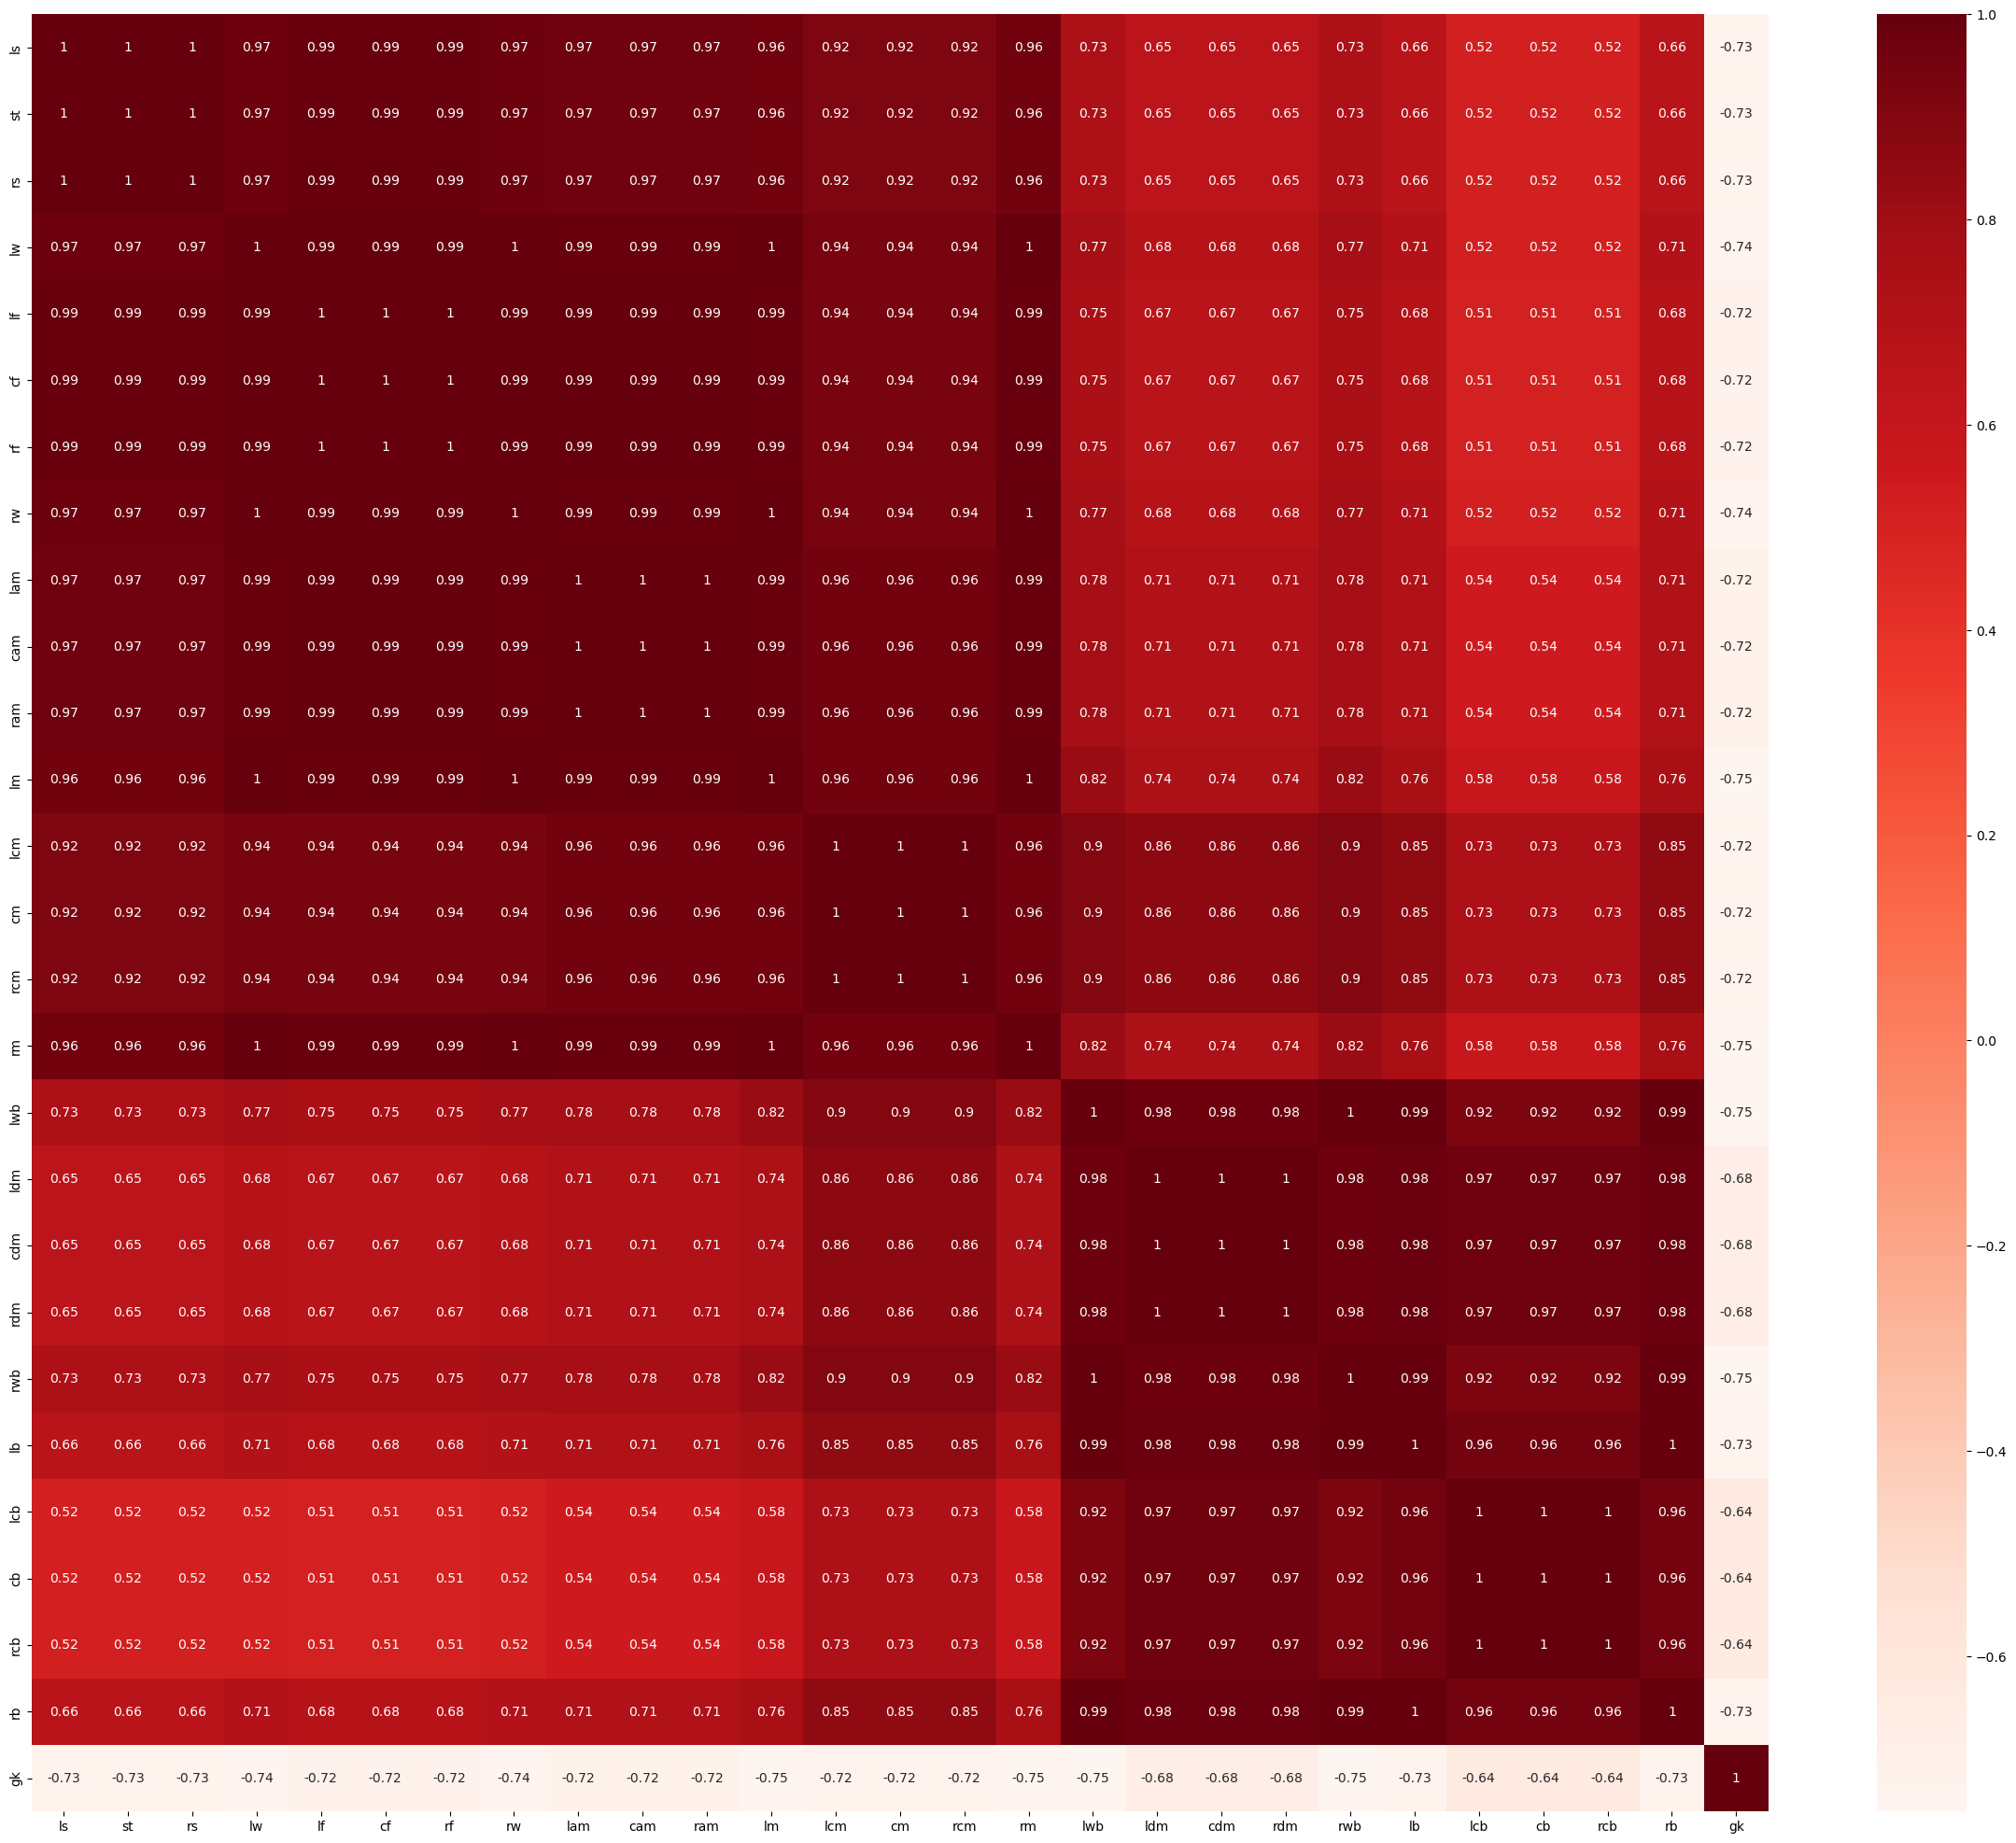

In [69]:
plt.figure(figsize=(30, 25))
sns.heatmap(players_numeric_only[position_values_columns].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [70]:
correlation_matrix = players_numeric_only[position_values_columns].corr()

perfectly_correlated_positions = np.where(np.abs(correlation_matrix.values) == 1)

perfectly_correlated_pairs = list(zip(correlation_matrix.index[perfectly_correlated_positions[0]],
                                       correlation_matrix.columns[perfectly_correlated_positions[1]]))

unique_correlated_pairs = set(tuple(sorted(pair)) for pair in perfectly_correlated_pairs)
unique_correlated_pairs = {pair for pair in unique_correlated_pairs if pair[0] != pair[1]}


print("There are "+str(len(unique_correlated_pairs))+" perfectly correlated columns:")
for pair in unique_correlated_pairs:
    print(pair)

There are 22 perfectly correlated columns:
('cdm', 'rdm')
('lw', 'rw')
('lf', 'rf')
('ldm', 'rdm')
('rs', 'st')
('lwb', 'rwb')
('ls', 'st')
('cam', 'lam')
('cf', 'rf')
('lb', 'rb')
('cdm', 'ldm')
('cb', 'rcb')
('cm', 'lcm')
('ls', 'rs')
('lcm', 'rcm')
('cm', 'rcm')
('lam', 'ram')
('lcb', 'rcb')
('cf', 'lf')
('cb', 'lcb')
('lm', 'rm')
('cam', 'ram')


In [71]:
goal_keeping_columns = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

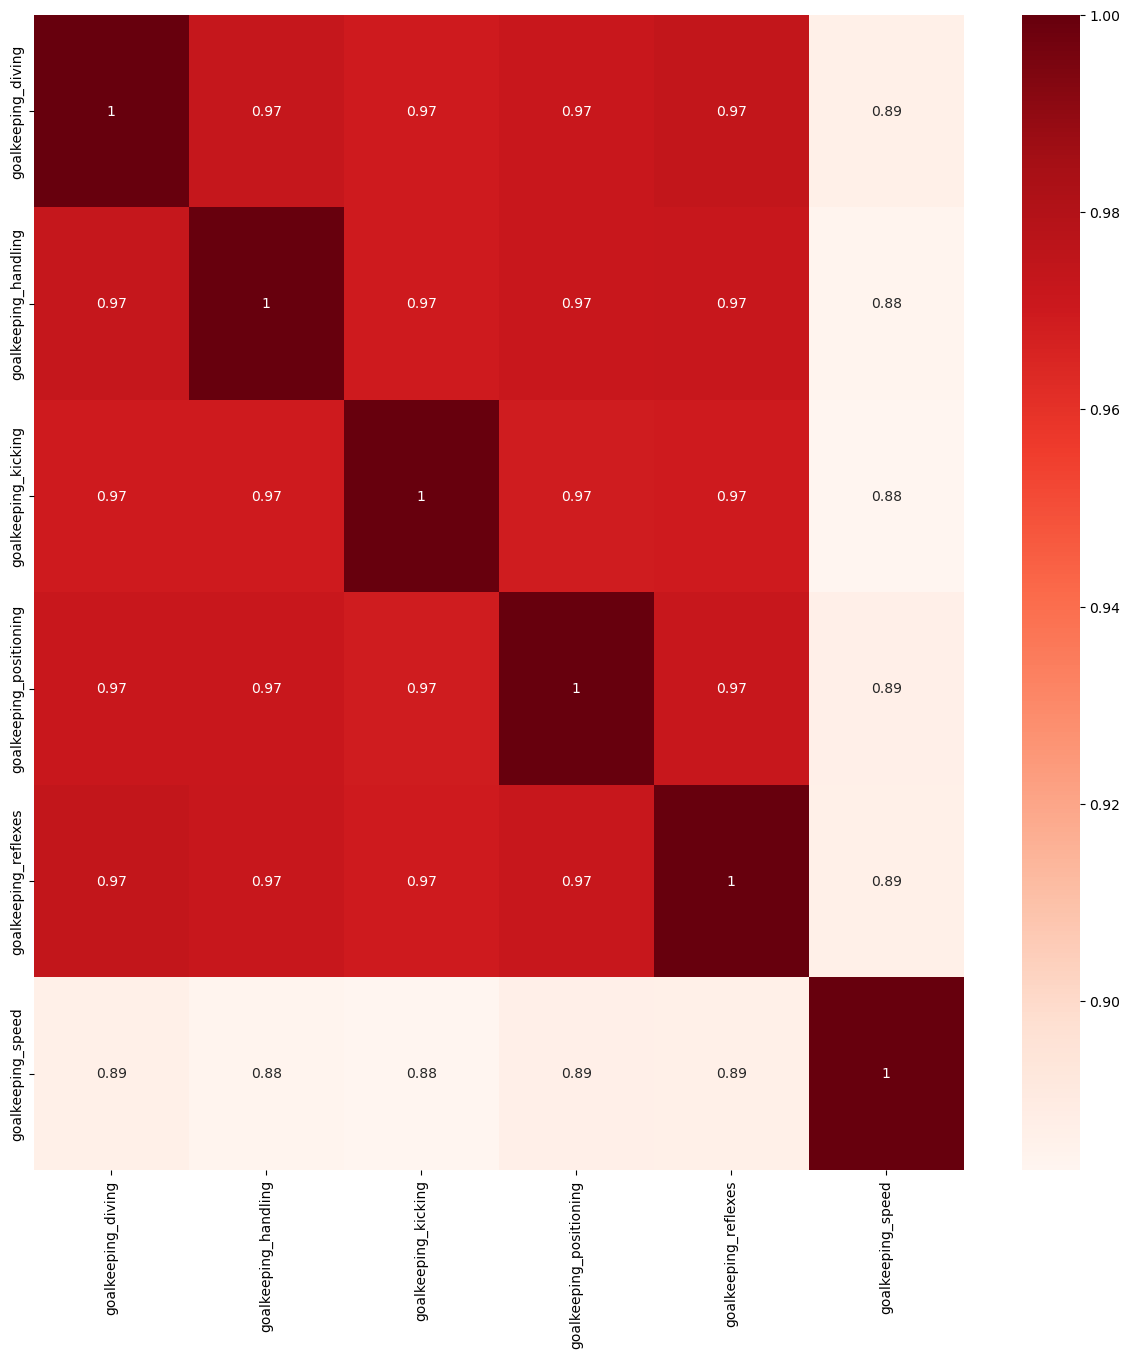

In [72]:
plt.figure(figsize=(15, 15))
sns.heatmap(players_numeric_only[goal_keeping_columns].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [73]:
defending_columns = ['defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle']   

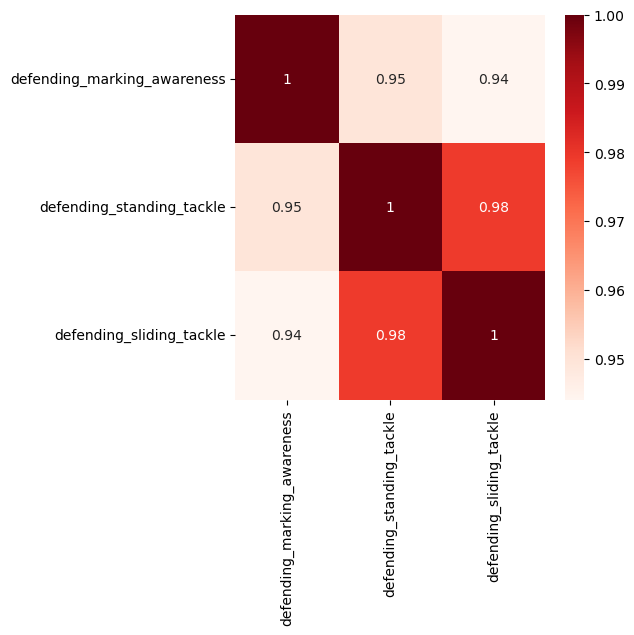

In [74]:
plt.figure(figsize=(5, 5))
sns.heatmap(players_numeric_only[defending_columns].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [75]:
mentality_columns = ['mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure']   

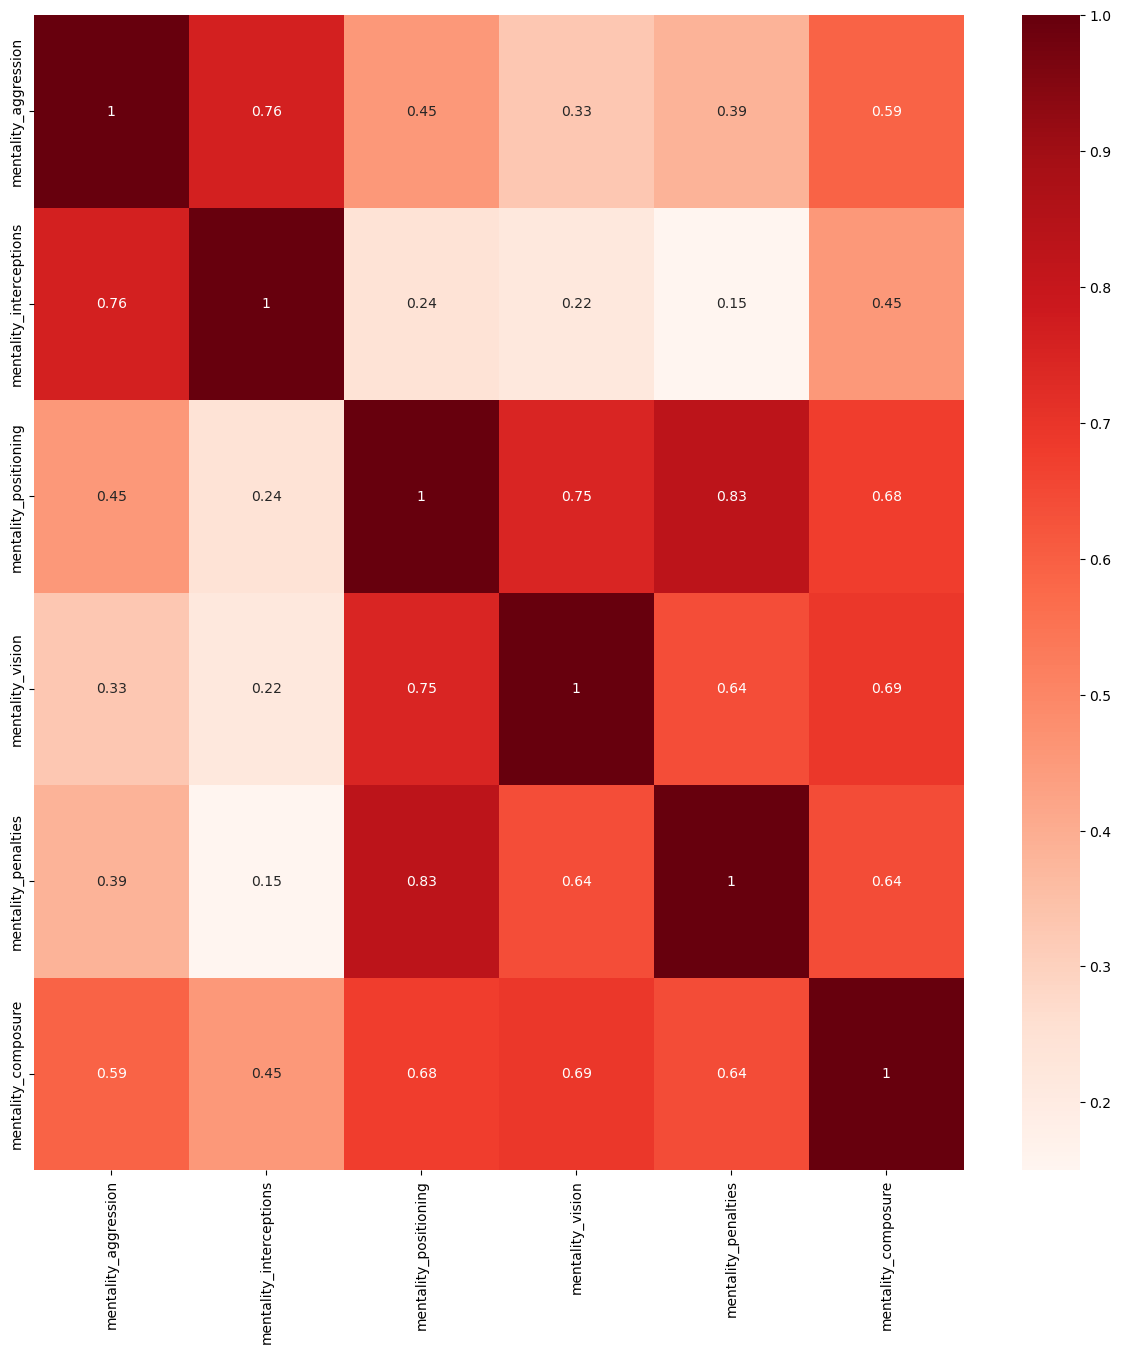

In [76]:
plt.figure(figsize=(15, 15))
sns.heatmap(players_numeric_only[mentality_columns].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [77]:
attacking_columns = ['attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys']   

/opt/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


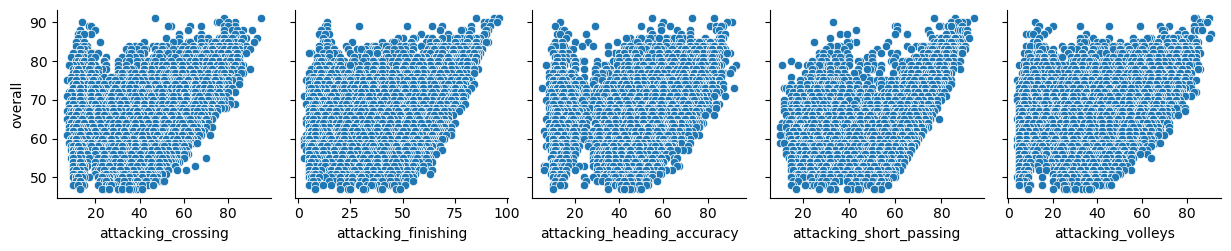

In [78]:
sns.pairplot(players_numeric_only, x_vars=attacking_columns, y_vars='overall', kind='scatter')


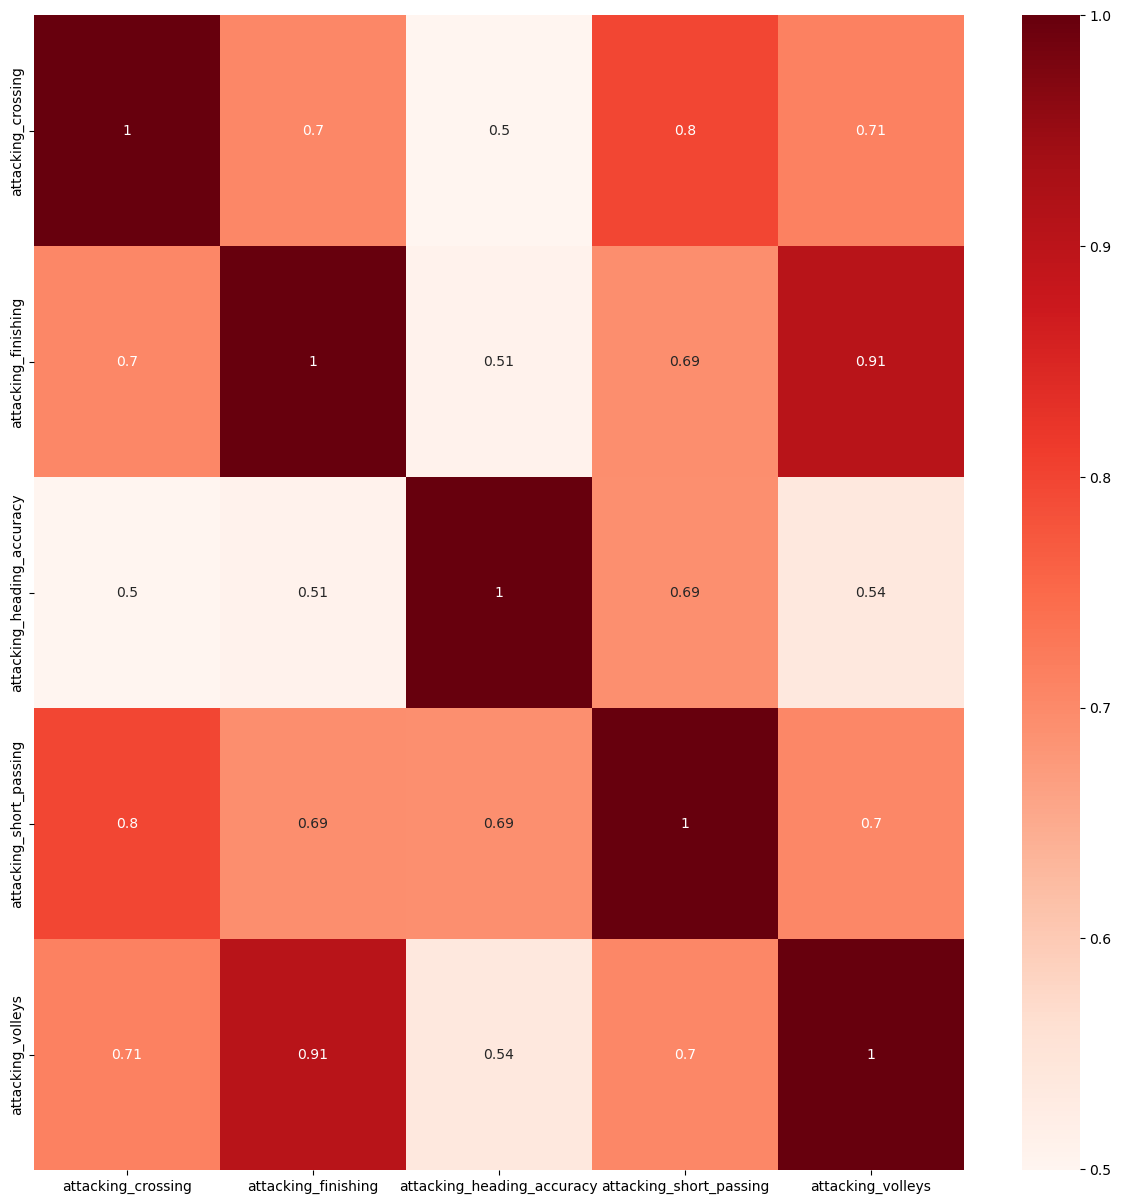

In [79]:
plt.figure(figsize=(15, 15))
sns.heatmap(players_numeric_only[attacking_columns].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

<Axes: title={'center': 'overall'}, xlabel='age'>

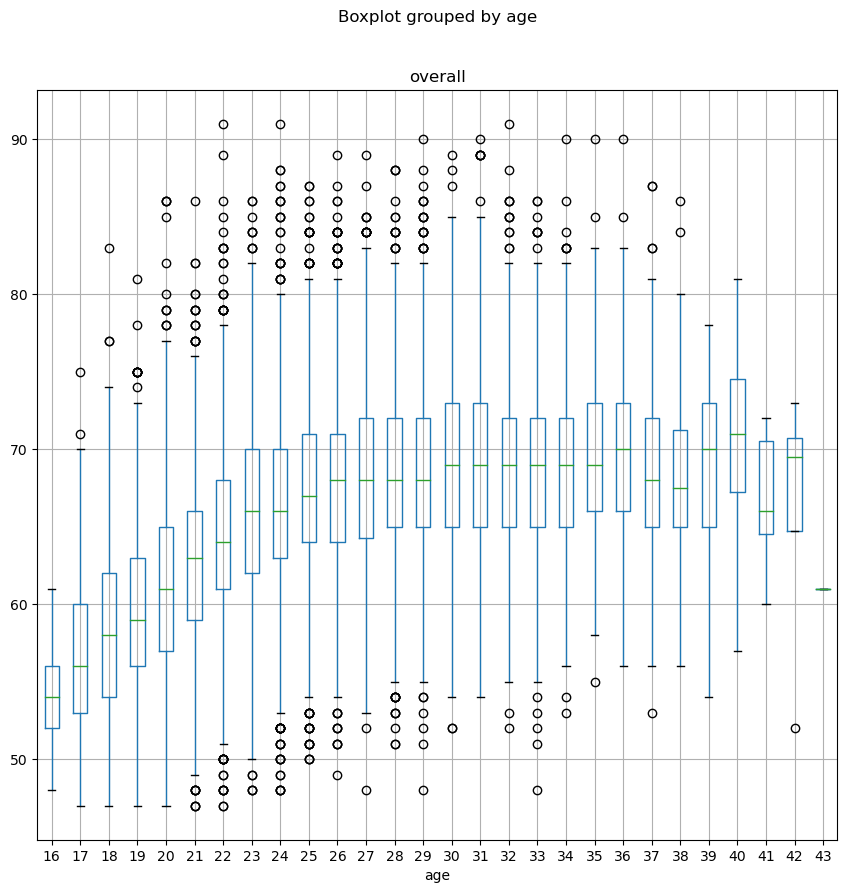

In [80]:
players_numeric_only.boxplot(column='overall', by='age', figsize=(10, 10), vert=True)

<Axes: xlabel='overall', ylabel='Count'>

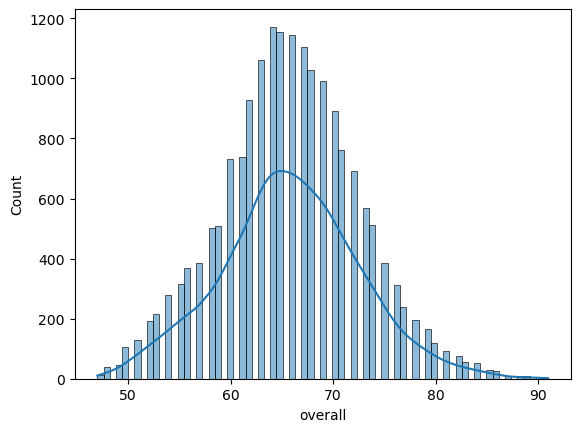

In [81]:
sns.histplot(players_numeric_only['overall'], kde=True)


## Feature Selection Based on Unsupervised Learning Technique

### Correlation Analysis within Player Positions

In our dataset, certain features within player positions exhibit correlation. To enhance the simplicity and effectiveness of our model, we will perform feature selection by retaining only one attribute from correlated sets.

This approach ensures that we include diverse yet representative features within each player position category.


In [82]:
cols = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
players_2024[cols].corr()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
ls,1.000000,1.000000,1.000000,0.973830,0.987812,0.987812,0.987812,0.973830,0.972559,0.972559,0.972559,0.964238,0.916688,0.916688,0.916688,0.964238,0.727233,0.654171,0.654171,0.654171,0.727233,0.664873,0.516535,0.516535,0.516535,0.664873,-0.727495
st,1.000000,1.000000,1.000000,0.973830,0.987812,0.987812,0.987812,0.973830,0.972559,0.972559,0.972559,0.964238,0.916688,0.916688,0.916688,0.964238,0.727233,0.654171,0.654171,0.654171,0.727233,0.664873,0.516535,0.516535,0.516535,0.664873,-0.727495
rs,1.000000,1.000000,1.000000,0.973830,0.987812,0.987812,0.987812,0.973830,0.972559,0.972559,0.972559,0.964238,0.916688,0.916688,0.916688,0.964238,0.727233,0.654171,0.654171,0.654171,0.727233,0.664873,0.516535,0.516535,0.516535,0.664873,-0.727495
lw,0.973830,0.973830,0.973830,1.000000,0.994407,0.994407,0.994407,1.000000,0.992693,0.992693,0.992693,0.995175,0.940102,0.940102,0.940102,0.995175,0.772677,0.679844,0.679844,0.679844,0.772677,0.705007,0.520185,0.520185,0.520185,0.705007,-0.740992
lf,0.987812,0.987812,0.987812,0.994407,1.000000,1.000000,1.000000,0.994407,0.994642,0.994642,0.994642,0.987766,0.940568,0.940568,0.940568,0.987766,0.749869,0.669078,0.669078,0.669078,0.749869,0.682282,0.509807,0.509807,0.509807,0.682282,-0.720071
cf,0.987812,0.987812,0.987812,0.994407,1.000000,1.000000,1.000000,0.994407,0.994642,0.994642,0.994642,0.987766,0.940568,0.940568,0.940568,0.987766,0.749869,0.669078,0.669078,0.669078,0.749869,0.682282,0.509807,0.509807,0.509807,0.682282,-0.720071
rf,0.987812,0.987812,0.987812,0.994407,1.000000,1.000000,1.000000,0.994407,0.994642,0.994642,0.994642,0.987766,0.940568,0.940568,0.940568,0.987766,0.749869,0.669078,0.669078,0.669078,0.749869,0.682282,0.509807,0.509807,0.509807,0.682282,-0.720071
rw,0.973830,0.973830,0.973830,1.000000,0.994407,0.994407,0.994407,1.000000,0.992693,0.992693,0.992693,0.995175,0.940102,0.940102,0.940102,0.995175,0.772677,0.679844,0.679844,0.679844,0.772677,0.705007,0.520185,0.520185,0.520185,0.705007,-0.740992
lam,0.972559,0.972559,0.972559,0.992693,0.994642,0.994642,0.994642,0.992693,1.000000,1.000000,1.000000,0.992214,0.962356,0.962356,0.962356,0.992214,0.780452,0.708109,0.708109,0.708109,0.780452,0.714427,0.542945,0.542945,0.542945,0.714427,-0.715975
cam,0.972559,0.972559,0.972559,0.992693,0.994642,0.994642,0.994642,0.992693,1.000000,1.000000,1.000000,0.992214,0.962356,0.962356,0.962356,0.992214,0.780452,0.708109,0.708109,0.708109,0.780452,0.714427,0.542945,0.542945,0.542945,0.714427,-0.715975


In [84]:
similar_cols = ["ls","rs","lf","rf","lam","ram","lcm","rcm","ldm","rdm","lcb","rcb","rwb","lwb","lw","cf","rw" ,"lm","lb","cam","cdm" ]
new_cols = [ col for col in cols if col not in similar_cols  ]
players_2024[new_cols].corr()
# NOw we delete similar cols 
drop_cols(similar_cols)


 awww to drop is ['ls', 'rs', 'lf', 'rf', 'lam', 'ram', 'lcm', 'rcm', 'ldm', 'rdm', 'lcb', 'rcb', 'rwb', 'lwb', 'lw', 'cf', 'rw', 'lm', 'lb', 'cam', 'cdm']


In [83]:
players_2024.head(5)

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,2024.0,18,Right,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,E. Haaland,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,2027.0,36,Left,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,K. De Bruyne,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2025.0,7,Right,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,L. Messi,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2025.0,52,Left,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,K. Benzema,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,2026.0,18,Right,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1


In [87]:
cols = ['pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
corr_matrix = players_2024.loc[: , cols].corr() 
corr_matrix[corr_matrix > 0.9 ]

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
pace,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.954515,0.968774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shooting,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.970935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.937461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passing,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dribbling,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972081,NaN,NaN,NaN,0.924012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defending,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.971542,NaN,NaN,NaN,NaN,0.973792,0.979482,0.966864,NaN,NaN,NaN,NaN,NaN,NaN
physic,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.905817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacking_crossing,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacking_finishing,NaN,0.970935,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.90574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.915962,NaN,NaN,0.911118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacking_heading_accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacking_short_passing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.912415,0.923887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
players_2024.columns

Index(['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_id', 'league_level',
       'club_position', 'club_jersey_number', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'body_type',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions

In [90]:
correlated_cols = [ "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle", "skill_dribbling",
                   "attacking_finishing","power_long_shots","movement_acceleration","movement_sprint_speed","mentality_interceptions","skill_ball_control"]
new_cols = [col for col in cols if col not in correlated_cols]
corr_matrix = players_2024.loc[: , new_cols].corr() 
corr_matrix[corr_matrix > 0.9]
drop_cols(correlated_cols + ["potential"]) 

 awww to drop is ['defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'skill_dribbling', 'attacking_finishing', 'power_long_shots', 'movement_acceleration', 'movement_sprint_speed', 'mentality_interceptions', 'skill_ball_control', 'potential']


In [91]:
players_2024.isna().sum()

short_name                           0
overall                              0
value_eur                          100
wage_eur                            87
age                                  0
height_cm                            0
weight_kg                            0
club_team_id                        87
league_id                           87
league_level                        87
club_position                        0
club_jersey_number                  87
club_joined_date                     0
club_contract_valid_until_year      87
nationality_id                       0
preferred_foot                       0
weak_foot                            0
skill_moves                          0
international_reputation             0
body_type                            0
release_clause_eur                1280
pace                              2045
shooting                          2045
passing                           2045
dribbling                         2045
defending                

In [94]:
other_correlated = ["release_clause_eur"] # we drop release_clause_eur since it is correlated with value_eur and it has more missing values
drop_cols(other_correlated)
corr_matrix = players_2024.iloc[: , 1 : ].corr() 
corr_matrix[corr_matrix > 0.8]

ValueError: could not convert string to float: 'Right'

In [95]:
gk_missing_attrs_condition =  players_2024["pace"].isna()
players_2024[ gk_missing_attrs_condition]

,short_name,overall,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,gk,work_rate_attacking,work_rate_defending
6,T. Courtois,90,63000000.0,250000.0,31,199,96,243.0,53.0,1.0,4,1.0,1870.0,2026.0,7,Left,3,1,5,9,NaN,NaN,NaN,NaN,NaN,NaN,14,13,33,12,19,20,35,63,88,45,57,68,38,70,23,13,44,27,66.0,85,89,76,90,93,46.0,32,33,31,29,29,88,1,1
9,Alisson,89,77500000.0,180000.0,30,193,91,9.0,13.0,1.0,4,1.0,1891.0,2027.0,54,Right,3,1,5,9,NaN,NaN,NaN,NaN,NaN,NaN,17,29,60,20,19,18,58,40,87,37,64,82,32,78,27,13,66,23,66.0,86,85,85,90,89,56.0,39,46,42,33,33,87,1,1
13,M. ter Stegen,89,54500000.0,220000.0,31,187,85,241.0,53.0,1.0,4,1.0,3370.0,2028.0,21,Right,4,1,5,9,NaN,NaN,NaN,NaN,NaN,NaN,18,11,61,14,18,12,63,39,85,43,67,72,35,78,43,11,70,25,70.0,86,85,89,86,91,47.0,35,45,39,33,31,87,1,1
19,Ederson,88,70000000.0,210000.0,29,188,86,10.0,13.0,1.0,4,31.0,2274.0,2026.0,54,Left,3,1,3,9,NaN,NaN,NaN,NaN,NaN,NaN,20,14,61,18,15,20,65,60,87,48,68,79,44,78,38,20,70,51,70.0,86,82,91,86,86,64.0,39,49,45,35,36,86,1,1
22,J. Oblak,88,61000000.0,90000.0,30,188,87,240.0,53.0,1.0,4,13.0,3355.0,2028.0,44,Right,3,1,4,9,NaN,NaN,NaN,NaN,NaN,NaN,13,15,43,13,13,14,40,64,85,48,59,72,42,78,36,11,67,11,68.0,85,90,78,86,87,46.0,32,39,34,34,32,86,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18319,F. Moore,48,80000.0,500.0,17,192,80,1572.0,65.0,1.0,4,41.0,77.0,2023.0,25,Right,2,1,1,7,NaN,NaN,NaN,NaN,NaN,NaN,11,11,25,5,11,11,21,37,38,49,37,32,23,36,19,5,27,12,21.0,48,49,49,48,49,27.0,17,19,18,16,16,47,1,1
18324,Zhou Zhengkai,48,60000.0,1000.0,22,183,72,110955.0,2012.0,1.0,4,41.0,518.0,2023.0,155,Right,3,1,1,4,NaN,NaN,NaN,NaN,NaN,NaN,12,15,16,15,12,12,16,22,32,45,37,41,24,50,22,10,22,13,30.0,56,49,49,42,46,23.0,20,17,17,20,17,47,1,1
18335,V. Singh,48,35000.0,500.0,29,182,74,113302.0,2149.0,1.0,4,33.0,92.0,2024.0,159,Right,1,1,1,4,NaN,NaN,NaN,NaN,NaN,NaN,10,11,28,5,11,12,22,24,45,41,38,31,17,41,28,7,37,14,25.0,46,45,51,46,51,20.0,18,21,18,18,16,47,1,1
18336,Liu Jun,48,15000.0,1000.0,33,185,81,131173.0,2012.0,1.0,4,26.0,165.0,2024.0,155,Right,2,1,1,7,NaN,NaN,NaN,NaN,NaN,NaN,12,13,15,10,13,12,18,29,42,42,35,49,28,56,23,13,32,13,25.0,48,54,46,43,48,32.0,20,19,19,21,19,47,1,1


In [96]:
players_2024.loc[gk_missing_attrs_condition,"pace"] = players_2024.loc[gk_missing_attrs_condition,"goalkeeping_speed" ] # replacing missing speed of gks with goalkeeping speed
players_2024["dribbling"].fillna(players_2024["dribbling"].min(),inplace=True) # replacing dribbling of gks with minimum of dribblers since gks are not dribllers
players_2024["passing"].fillna(players_2024["passing"].min(),inplace=True)
players_2024["physic"].fillna(players_2024["power_strength"],inplace=True)
players_2024["defending"].fillna(players_2024["defending"].min(),inplace=True)
players_2024["shooting"].fillna(players_2024["shooting"].min(),inplace=True)
players_2024.head(8)

,short_name,overall,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,2024.0,18,Right,4,5,5,9,97.0,90.0,80.0,92.0,36.0,78.0,78,73,86,84,80,69,71,93,93,82,90,88,88,77,64,93,83,84,88.0,13,5,7,11,6,15.0,90,81,89,54,63,18,2,0
1,E. Haaland,91,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,2027.0,36,Left,3,3,5,9,89.0,93.0,66.0,80.0,45.0,88.0,47,83,77,90,77,62,53,76,94,72,94,93,76,93,87,96,74,84,87.0,7,14,13,11,7,15.0,90,74,79,62,60,19,2,1
2,K. De Bruyne,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2025.0,7,Right,5,4,5,9,72.0,88.0,94.0,87.0,65.0,78.0,95,55,94,83,92,83,94,74,92,78,92,72,88,74,75,88,95,83,88.0,15,13,5,10,13,15.0,83,90,88,70,75,21,2,1
3,L. Messi,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2025.0,52,Left,4,4,5,9,80.0,87.0,90.0,94.0,33.0,64.0,83,60,91,86,93,93,90,91,88,95,83,71,70,68,44,91,92,75,96.0,6,11,15,14,8,15.0,85,85,89,49,59,19,0,0
4,K. Benzema,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,2026.0,18,Right,4,4,5,4,79.0,88.0,83.0,87.0,39.0,78.0,75,90,89,88,82,73,76,77,92,72,87,85,82,82,63,92,90,85,90.0,13,11,5,5,7,15.0,88,82,86,55,60,18,1,1
5,R. Lewandowski,90,58000000.0,340000.0,34,185,81,241.0,53.0,1.0,1,9.0,431.0,2026.0,37,Right,4,4,5,9,75.0,91.0,80.0,87.0,44.0,84.0,76,91,84,89,79,85,70,77,93,83,91,92,76,89,81,94,81,90,88.0,15,6,12,8,10,15.0,89,80,84,61,61,19,2,1
6,T. Courtois,90,63000000.0,250000.0,31,199,96,243.0,53.0,1.0,4,1.0,1870.0,2026.0,7,Left,3,1,5,9,46.0,19.0,25.0,28.0,15.0,70.0,14,13,33,12,19,20,35,63,88,45,57,68,38,70,23,13,44,27,66.0,85,89,76,90,93,46.0,32,33,31,29,29,88,1,1
7,H. Kane,90,119500000.0,170000.0,29,188,85,21.0,19.0,1.0,1,9.0,41.0,2027.0,14,Right,5,3,5,9,69.0,93.0,84.0,83.0,49.0,83.0,80,89,87,89,82,65,88,66,93,73,93,87,83,84,80,94,87,92,92.0,8,10,11,14,11,15.0,89,83,85,63,64,20,2,2


In [97]:

players_2024.shape

(18350, 59)

In [98]:
for col in players_2024.columns  : 
    print(f" for column {col} it has variance={players_2024[col].var()}")

TypeError: could not convert string to float: 'K. Mbappé'

In [99]:
players_2024["international_reputation"].value_counts()

international_reputation
1    17135
2      879
3      287
4       33
5       16
Name: count, dtype: int64

In [100]:
players_2024.iloc[ : , 1:].var().sort_values(ascending=False)


TypeError: could not convert string to float: 'Right'

In [101]:
players_2024["physic"].value_counts()

physic
68.0    787
70.0    747
69.0    716
65.0    679
67.0    678
       ... 
89.0      3
31.0      3
30.0      3
28.0      2
26.0      2
Name: count, Length: 63, dtype: int64

In [359]:
players_2024.head(5)

,short_name,overall,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,2024.0,18,1,4,5,5,9,97.0,90.0,80.0,92.0,36.0,78.0,78,73,86,84,80,69,71,93,93,82,90,88,88,77,64,93,83,84,88.0,13,5,7,11,6,15.0,90,81,89,54,63,18,2,0
1,E. Haaland,91,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,2027.0,36,0,3,3,5,9,89.0,93.0,66.0,80.0,45.0,88.0,47,83,77,90,77,62,53,76,94,72,94,93,76,93,87,96,74,84,87.0,7,14,13,11,7,15.0,90,74,79,62,60,19,2,1
2,K. De Bruyne,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2025.0,7,1,5,4,5,9,72.0,88.0,94.0,87.0,65.0,78.0,95,55,94,83,92,83,94,74,92,78,92,72,88,74,75,88,95,83,88.0,15,13,5,10,13,15.0,83,90,88,70,75,21,2,1
3,L. Messi,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2025.0,52,0,4,4,5,9,80.0,87.0,90.0,94.0,33.0,64.0,83,60,91,86,93,93,90,91,88,95,83,71,70,68,44,91,92,75,96.0,6,11,15,14,8,15.0,85,85,89,49,59,19,0,0
4,K. Benzema,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,2026.0,18,1,4,4,5,4,79.0,88.0,83.0,87.0,39.0,78.0,75,90,89,88,82,73,76,77,92,72,87,85,82,82,63,92,90,85,90.0,13,11,5,5,7,15.0,88,82,86,55,60,18,1,1


In [105]:
#Min Max scaling column contract valid until 
players_2024["club_contract_valid_until_year"] = (players_2024["club_contract_valid_until_year"] -2023 )
print((players_2024["club_contract_valid_until_year"].unique()))
players_2024.rename(columns={"club_contract_valid_until_year" : "years_for_contract_validity" })

[-4045. -4042. -4044. -4043. -4041. -4040. -4038. -4037. -4046.    nan
 -4039.]


,short_name,overall,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,years_for_contract_validity,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,-4045.0,18,Right,4,5,5,9,97.0,90.0,80.0,92.0,36.0,78.0,78,73,86,84,80,69,71,93,93,82,90,88,88,77,64,93,83,84,88.0,13,5,7,11,6,15.0,90,81,89,54,63,18,2,0
1,E. Haaland,91,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,-4042.0,36,Left,3,3,5,9,89.0,93.0,66.0,80.0,45.0,88.0,47,83,77,90,77,62,53,76,94,72,94,93,76,93,87,96,74,84,87.0,7,14,13,11,7,15.0,90,74,79,62,60,19,2,1
2,K. De Bruyne,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,-4044.0,7,Right,5,4,5,9,72.0,88.0,94.0,87.0,65.0,78.0,95,55,94,83,92,83,94,74,92,78,92,72,88,74,75,88,95,83,88.0,15,13,5,10,13,15.0,83,90,88,70,75,21,2,1
3,L. Messi,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,-4044.0,52,Left,4,4,5,9,80.0,87.0,90.0,94.0,33.0,64.0,83,60,91,86,93,93,90,91,88,95,83,71,70,68,44,91,92,75,96.0,6,11,15,14,8,15.0,85,85,89,49,59,19,0,0
4,K. Benzema,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,-4043.0,18,Right,4,4,5,4,79.0,88.0,83.0,87.0,39.0,78.0,75,90,89,88,82,73,76,77,92,72,87,85,82,82,63,92,90,85,90.0,13,11,5,5,7,15.0,88,82,86,55,60,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18345,S. Telem,47,100000.0,500.0,20,176,76,114168.0,2149.0,1.0,7,44.0,403.0,-4045.0,159,Left,3,2,1,4,60.0,25.0,25.0,28.0,47.0,61.0,23,42,27,27,23,26,20,43,40,70,39,62,56,68,47,20,28,34,39.0,15,7,14,6,8,15.0,33,29,31,47,43,13,1,1
18346,Jin Liangkuan,47,100000.0,1000.0,21,183,74,114628.0,2012.0,1.0,7,5.0,56.0,-4041.0,155,Right,3,2,1,5,55.0,28.0,31.0,33.0,51.0,47.0,26,45,32,30,32,26,25,46,45,59,36,36,56,44,46,28,38,38,46.0,8,13,9,6,7,15.0,35,35,35,47,46,13,1,1
18347,M. Mewlan,47,100000.0,2000.0,19,184,65,111724.0,2012.0,1.0,1,43.0,264.0,-4045.0,155,Right,2,2,1,4,68.0,46.0,38.0,46.0,16.0,45.0,32,41,44,37,31,34,31,57,49,69,44,40,54,46,34,43,42,61,40.0,12,6,7,10,8,15.0,47,40,46,27,33,13,1,0
18348,Yin Jie,47,90000.0,1000.0,21,178,74,112163.0,2012.0,1.0,2,26.0,172.0,-4046.0,155,Right,3,2,1,4,57.0,37.0,46.0,46.0,38.0,57.0,36,42,54,36,34,35,50,60,44,67,44,48,59,60,50,53,46,40,39.0,7,7,13,12,14,15.0,45,47,47,44,45,14,1,1


In [106]:
players_2024.isna().sum()

short_name                          0
overall                             0
value_eur                         100
wage_eur                           87
age                                 0
height_cm                           0
weight_kg                           0
club_team_id                       87
league_id                          87
league_level                       87
club_position                       0
club_jersey_number                 87
club_joined_date                    0
club_contract_valid_until_year     87
nationality_id                      0
preferred_foot                      0
weak_foot                           0
skill_moves                         0
international_reputation            0
body_type                           0
pace                                0
shooting                            0
passing                             0
dribbling                           0
defending                           0
physic                              0
attacking_cr

In [107]:
players_2024 = players_2024.loc[ ~players_2024["wage_eur"].isna() , : ]  # deleting all 87 rows that have missing values in (club_contract_valid_until_year,...), 87 rows is not a lot

In [108]:
players_2024.isna().sum()

short_name                         0
overall                            0
value_eur                         13
wage_eur                           0
age                                0
height_cm                          0
weight_kg                          0
club_team_id                       0
league_id                          0
league_level                       0
club_position                      0
club_jersey_number                 0
club_joined_date                   0
club_contract_valid_until_year     0
nationality_id                     0
preferred_foot                     0
weak_foot                          0
skill_moves                        0
international_reputation           0
body_type                          0
pace                               0
shooting                           0
passing                            0
dribbling                          0
defending                          0
physic                             0
attacking_crossing                 0
a

In [111]:
#there still only 13 missing values from wage _eur
players_2024 = players_2024.loc[ ~players_2024["value_eur"].isna() , : ] 

In [112]:
players_2024.isna().sum()

short_name                        0
overall                           0
value_eur                         0
wage_eur                          0
age                               0
height_cm                         0
weight_kg                         0
club_team_id                      0
league_id                         0
league_level                      0
club_position                     0
club_jersey_number                0
club_joined_date                  0
club_contract_valid_until_year    0
nationality_id                    0
preferred_foot                    0
weak_foot                         0
skill_moves                       0
international_reputation          0
body_type                         0
pace                              0
shooting                          0
passing                           0
dribbling                         0
defending                         0
physic                            0
attacking_crossing                0
attacking_heading_accuracy  

In [113]:
players_2024.shape

(18250, 59)

In [114]:

csv_file_path = "Fifa24PLayers_cleaned_data.csv"
# Export the DataFrame to CSV
players_2024.to_csv(csv_file_path, index=False)

<h1 style="color:Green ">
    Data Exploration, Preprocessing
</h1>

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
csv_file_path = "Fifa24PLayers_cleaned_data.csv"
players_2024 = pd.read_csv(csv_file_path)

In [117]:
drop_cols(["short_name"])
players_2024

,overall,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,gk,work_rate_attacking,work_rate_defending
0,91,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,-4045.0,18,Right,4,5,5,9,97.0,90.0,80.0,92.0,36.0,78.0,78,73,86,84,80,69,71,93,93,82,90,88,88,77,64,93,83,84,88.0,13,5,7,11,6,15.0,90,81,89,54,63,18,2,0
1,91,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,-4042.0,36,Left,3,3,5,9,89.0,93.0,66.0,80.0,45.0,88.0,47,83,77,90,77,62,53,76,94,72,94,93,76,93,87,96,74,84,87.0,7,14,13,11,7,15.0,90,74,79,62,60,19,2,1
2,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,-4044.0,7,Right,5,4,5,9,72.0,88.0,94.0,87.0,65.0,78.0,95,55,94,83,92,83,94,74,92,78,92,72,88,74,75,88,95,83,88.0,15,13,5,10,13,15.0,83,90,88,70,75,21,2,1
3,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,-4044.0,52,Left,4,4,5,9,80.0,87.0,90.0,94.0,33.0,64.0,83,60,91,86,93,93,90,91,88,95,83,71,70,68,44,91,92,75,96.0,6,11,15,14,8,15.0,85,85,89,49,59,19,0,0
4,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,-4043.0,18,Right,4,4,5,4,79.0,88.0,83.0,87.0,39.0,78.0,75,90,89,88,82,73,76,77,92,72,87,85,82,82,63,92,90,85,90.0,13,11,5,5,7,15.0,88,82,86,55,60,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,47,100000.0,500.0,20,176,76,114168.0,2149.0,1.0,7,44.0,403.0,-4045.0,159,Left,3,2,1,4,60.0,25.0,25.0,28.0,47.0,61.0,23,42,27,27,23,26,20,43,40,70,39,62,56,68,47,20,28,34,39.0,15,7,14,6,8,15.0,33,29,31,47,43,13,1,1
18246,47,100000.0,1000.0,21,183,74,114628.0,2012.0,1.0,7,5.0,56.0,-4041.0,155,Right,3,2,1,5,55.0,28.0,31.0,33.0,51.0,47.0,26,45,32,30,32,26,25,46,45,59,36,36,56,44,46,28,38,38,46.0,8,13,9,6,7,15.0,35,35,35,47,46,13,1,1
18247,47,100000.0,2000.0,19,184,65,111724.0,2012.0,1.0,1,43.0,264.0,-4045.0,155,Right,2,2,1,4,68.0,46.0,38.0,46.0,16.0,45.0,32,41,44,37,31,34,31,57,49,69,44,40,54,46,34,43,42,61,40.0,12,6,7,10,8,15.0,47,40,46,27,33,13,1,0
18248,47,90000.0,1000.0,21,178,74,112163.0,2012.0,1.0,2,26.0,172.0,-4046.0,155,Right,3,2,1,4,57.0,37.0,46.0,46.0,38.0,57.0,36,42,54,36,34,35,50,60,44,67,44,48,59,60,50,53,46,40,39.0,7,7,13,12,14,15.0,45,47,47,44,45,14,1,1


array([[<Axes: title={'center': 'overall'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'value_eur'}>],
       [<Axes: title={'center': 'wage_eur'}>,
        <Axes: title={'center': 'league_id'}>,
        <Axes: title={'center': 'club_team_id'}>],
       [<Axes: title={'center': 'st'}>, <Axes: title={'center': 'cm'}>,
        <Axes: title={'center': 'rm'}>],
       [<Axes: title={'center': 'cb'}>, <Axes: title={'center': 'rb'}>,
        <Axes: title={'center': 'attacking_crossing'}>]], dtype=object)

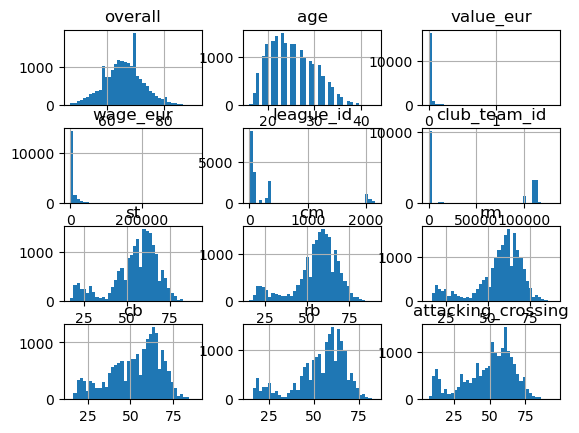

In [118]:
players_2024.loc[ : , ["overall","age","value_eur","wage_eur","league_id","club_team_id","st","cm","rm","cb","rb","attacking_crossing"]].hist(bins=40)
# Note : ST,CM,RM,CB,RB follows approximately bell curve

## Scaling Data

To ensure uniformity and facilitate accurate model training, we'll scale our data. Scaling is crucial for machine learning algorithms, especially those sensitive to the magnitude of features. This process will bring all attributes to a comparable scale, preventing certain features from dominating the model training process.


<h6 style="color:red">Can nominal data be scaled  ?</h6>

In [122]:
import math
normalized_cols = []
standarized_cols = ["st","cm","rm","cb","rb","value_eur","wage_eur"] # generally for attributes that have bell curve or follow a normal distribution
scaled_cols = normalized_cols + (standarized_cols) 
for col in scaled_cols :

    min = players_2024[col].min()
    max = players_2024[col].max()
    mean = players_2024[col].mean()
    std = math.pow(players_2024[col].var(),0.5)
    if col in normalized_cols : 
        players_2024[col] = (players_2024[col] - min)/(max - min)
    elif col in standarized_cols : 
        players_2024[col] = (players_2024[col] - mean)/(std)
        




## Reducing Number of Attributes Based on Overall Correlation

To streamline our analysis, we will reduce the number of attributes by eliminating those whose correlation with the overall rating falls below a specified threshold. This selective approach helps maintain focus on the most influential features in predicting player overall ratings.


In [123]:
threshold = 0.2 # very low threshold 
corr_matrix = players_2024.corr()
corr_with_target = corr_matrix["overall"]
cols_not_correlated = corr_with_target[ abs(corr_with_target)<=threshold ].index
cols_not_correlated

ValueError: could not convert string to float: 'Right'

In [124]:
drop_cols( ['height_cm', 'club_position', 'preferred_foot', 'body_type',"body_type","weight_kg","league_level","club_jersey_number","club_joined_date"
           ,"club_contract_valid_until_year","movement_balance","gk"] )

 awww to drop is ['height_cm', 'club_position', 'preferred_foot', 'body_type', 'body_type', 'weight_kg', 'league_level', 'club_jersey_number', 'club_joined_date', 'club_contract_valid_until_year', 'movement_balance', 'gk']


In [125]:
players_2024.shape

(18250, 47)

In [126]:
players_2024.corr()

,overall,value_eur,wage_eur,age,club_team_id,league_id,nationality_id,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,work_rate_attacking,work_rate_defending
overall,1.000000,0.554267,0.603468,0.448459,-0.212297,-0.219896,-0.184526,0.212350,0.337799,0.469771,0.207823,0.395097,0.503926,0.445796,0.309453,0.517150,0.392789,0.349738,0.533800,0.368632,0.410945,0.375203,0.518824,0.256361,0.874053,0.556934,0.567858,0.385807,0.365806,0.394631,0.355148,0.524221,0.335288,0.689730,-0.022038,-0.020804,-0.021205,-0.014013,-0.019570,0.019844,0.482874,0.545081,0.473661,0.410800,0.430582,0.162130,0.106254
value_eur,0.554267,1.000000,0.831595,0.033758,-0.170097,-0.113023,-0.070984,0.147201,0.232511,0.657368,0.163929,0.243088,0.296125,0.280605,0.144892,0.218335,0.224509,0.168514,0.305003,0.230831,0.246178,0.208095,0.292398,0.168851,0.495463,0.300843,0.244191,0.197421,0.131279,0.186180,0.222500,0.328170,0.188081,0.380804,-0.029394,-0.028768,-0.026314,-0.027479,-0.026479,-0.013900,0.284870,0.314105,0.287508,0.196399,0.227562,0.122216,0.069223
wage_eur,0.603468,0.831595,1.000000,0.142590,-0.223577,-0.162491,-0.079922,0.161858,0.236837,0.671924,0.143481,0.257494,0.323260,0.294678,0.179208,0.260371,0.251985,0.205427,0.332587,0.249689,0.274180,0.231385,0.324371,0.160992,0.546101,0.344087,0.286844,0.202722,0.170486,0.230386,0.235159,0.353835,0.207917,0.434754,-0.026101,-0.024471,-0.021816,-0.023574,-0.023171,-0.002387,0.306060,0.342528,0.304311,0.236171,0.257365,0.117129,0.082418
age,0.448459,0.033758,0.142590,1.000000,0.075261,0.054264,0.039783,0.057824,0.048916,0.213598,-0.124082,0.127596,0.159623,0.058521,0.149490,0.415030,0.127339,0.158159,0.154681,0.141637,0.142046,0.182080,0.198780,-0.014037,0.418080,0.275323,0.345523,0.155583,0.355684,0.233668,0.092760,0.200668,0.147102,0.344766,0.103252,0.107851,0.105819,0.114102,0.103570,0.142730,0.143800,0.178532,0.103517,0.205177,0.152211,-0.005511,0.086314
club_team_id,-0.212297,-0.170097,-0.223577,0.075261,1.000000,0.377083,0.265777,-0.095248,-0.070023,-0.132261,-0.049204,-0.076970,-0.107290,-0.108709,-0.061767,-0.098403,-0.080320,-0.065494,-0.112562,-0.085065,-0.106272,-0.053500,-0.112282,-0.059788,-0.193878,-0.133195,-0.113740,-0.045902,-0.060604,-0.095718,-0.063525,-0.132563,-0.039699,-0.174185,-0.013169,-0.010270,-0.011586,-0.009128,-0.009227,-0.019606,-0.100273,-0.116565,-0.102837,-0.083041,-0.086552,-0.067225,-0.053129
league_id,-0.219896,-0.113023,-0.162491,0.054264,0.377083,1.000000,0.244980,-0.033711,-0.066259,-0.090783,-0.028549,-0.079764,-0.111463,-0.103494,-0.062356,-0.084616,-0.083542,-0.068342,-0.120954,-0.080335,-0.110088,-0.065991,-0.119782,-0.029569,-0.178735,-0.149420,-0.103478,-0.024588,-0.051827,-0.094512,-0.064185,-0.117783,-0.058735,-0.195174,-0.009985,-0.009127,-0.011693,-0.009686,-0.010821,-0.017063,-0.097742,-0.114789,-0.097552,-0.082132,-0.082410,-0.056717,-0.051861
nationality_id,-0.184526,-0.070984,-0.079922,0.039783,0.265777,0.244980,1.000000,-0.010198,-0.009462,-0.063337,0.046116,-0.045071,-0.075977,-0.045529,-0.047509,-0.046743,-0.049323,-0.050048,-0.092684,-0.039379,-0.058349,-0.050259,-0.084190,0.030187,-0.165164,-0.106015,-0.060438,0.011313,-0.034848,-0.032729,-0.010583,-0.069697,-0.047052,-0.122629,-0.035372,-0.036805,-0.035175,-0.036516,-0.037060,-0.032068,-0.050380,-0.070957,-0.045617,-0.056094,-0.048605,-0.010999,-0.015854
weak_foot,0.212350,0.147201,0.161858,0.057824,-0.095248,-0.033711,-0.010198,1.000000,0.341664,0.136333,0.257515,0.369423,0.338743,0.353689

In [127]:
players_2024

,overall,value_eur,wage_eur,age,club_team_id,league_id,nationality_id,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,st,cm,rm,cb,rb,work_rate_attacking,work_rate_defending
0,91,23.623864,11.824554,24,73.0,16.0,18,4,5,5,97.0,90.0,80.0,92.0,36.0,78.0,78,73,86,84,80,69,71,93,93,90,88,88,77,64,93,83,84,88.0,13,5,7,11,6,15.0,2.575918,1.915483,2.288917,0.084425,0.657030,2,0
1,91,24.086656,17.702837,22,10.0,13.0,36,3,3,5,89.0,93.0,66.0,80.0,45.0,88.0,47,83,77,90,77,62,53,76,94,94,93,76,93,87,96,74,84,87.0,7,14,13,11,7,15.0,2.575918,1.389974,1.582639,0.619158,0.446103,2,1
2,91,13.244102,18.237226,32,10.0,13.0,7,5,4,5,72.0,88.0,94.0,87.0,65.0,78.0,95,55,94,83,92,83,94,74,92,92,72,88,74,75,88,95,83,88.0,15,13,5,10,13,15.0,2.063483,2.591136,2.218290,1.153891,1.500739,2,1
3,90,5.046074,0.762694,36,112893.0,39.0,52,4,4,5,80.0,87.0,90.0,94.0,33.0,64.0,83,60,91,86,93,93,90,91,88,83,71,70,68,44,91,92,75,96.0,6,11,15,14,8,15.0,2.209893,2.215773,2.288917,-0.249782,0.375793,0,0
4,90,6.368336,4.610297,35,607.0,350.0,18,4,4,5,79.0,88.0,83.0,87.0,39.0,78.0,75,90,89,88,82,73,76,77,92,87,85,82,82,63,92,90,85,90.0,13,11,5,5,7,15.0,2.429508,1.990555,2.077034,0.151267,0.446103,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,47,-0.361981,-0.439682,20,114168.0,2149.0,159,3,2,1,60.0,25.0,25.0,28.0,47.0,61.0,23,42,27,27,23,26,20,43,40,39,62,56,68,47,20,28,34,39.0,15,7,14,6,8,15.0,-1.596761,-1.988293,-1.807495,-0.383466,-0.749152,1,1
18246,47,-0.361981,-0.412963,21,114628.0,2012.0,155,3,2,1,55.0,28.0,31.0,33.0,51.0,47.0,26,45,32,30,32,26,25,46,45,36,36,56,44,46,28,38,38,46.0,8,13,9,6,7,15.0,-1.450351,-1.537857,-1.524984,-0.383466,-0.538225,1,1
18247,47,-0.361981,-0.359524,19,111724.0,2012.0,155,2,2,1,68.0,46.0,38.0,46.0,16.0,45.0,32,41,44,37,31,34,31,57,49,44,40,54,46,34,43,42,61,40.0,12,6,7,10,8,15.0,-0.571893,-1.162494,-0.748078,-1.720297,-1.452243,1,0
18248,47,-0.363303,-0.412963,21,112163.0,2012.0,155,3,2,1,57.0,37.0,46.0,46.0,38.0,57.0,36,42,54,36,34,35,50,60,44,44,48,59,60,50,53,46,40,39.0,7,7,13,12,14,15.0,-0.718302,-0.636986,-0.677450,-0.583990,-0.608534,1,1


## Feature Subset Selection (FSS) Techniques

Feature Subset Selection involves choosing a subset of relevant features from the dataset to improve model performance. Various techniques can be employed for this purpose. Let's explore different Feature Subset Selection techniques to refine our feature set and enhance the predictive capabilities of our model.


In [130]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn_genetic import GAFeatureSelectionCV
import random



In [129]:
def variance_threshold_selector(X, threshold=0.0):
    selector = VarianceThreshold(threshold)
    selector.fit(X)
    return X.columns[selector.get_support(indices=True)]

In [128]:
print(players_2024["league_id"].var())

376766.28782206244


In [132]:
print(players_2024["league_id"].value_counts())
league_ids = sorted(players_2024["league_id"].unique()) # Nationality Ids values are not very separated from each other

k = len(league_ids)
i = 1
list_ids = []
map = {}
while i<=k :
    list_ids.append(i)
    i=i+1
for val in players_2024["league_id"].unique() :
    rand_id = random.choice(list_ids)
    map[val] = rand_id
    list_ids.remove(rand_id)
players_2024["league_id"].replace(map,inplace=True)   
print(players_2024["league_id"].value_counts())
# IDS have very distinct values tha

league_id
39.0      841
353.0     808
14.0      696
60.0      638
61.0      636
13.0      623
54.0      611
53.0      596
31.0      562
32.0      545
68.0      544
17.0      540
2076.0    537
19.0      527
350.0     524
20.0      513
10.0      501
16.0      500
308.0     495
66.0      478
2012.0    447
330.0     430
4.0       426
56.0      421
41.0      407
83.0      335
189.0     332
80.0      323
50.0      315
2149.0    313
351.0     289
1.0       288
7.0       280
65.0      271
336.0     195
2018.0    174
335.0     171
337.0     168
2020.0    165
2019.0    153
2017.0    136
338.0     114
63.0       84
319.0      79
332.0      56
317.0      54
64.0       28
318.0      28
322.0      28
2013.0     25
Name: count, dtype: int64
league_id
18.0    841
30.0    808
14.0    696
40.0    638
5.0     636
27.0    623
41.0    611
48.0    596
34.0    562
7.0     545
17.0    544
38.0    540
44.0    537
32.0    527
50.0    524
36.0    513
22.0    501
12.0    500
6.0     495
31.0    478
23.0    447
19

In [133]:
players_2024["league_id"].var() # compared with previous values it was 376766.28782206244

186.1346383971458

In [135]:
def variance_threshold_selector(X, threshold=0.0):
    selector = VarianceThreshold(threshold)
    selector.fit(X)
    return X.columns[selector.get_support(indices=True)]

In [136]:
def correlation_selector(X, threshold=0.8):
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

In [137]:
def chi_squared_selector(X, y, top_k=4):
    selector = SelectKBest(y, k=top_k)
    selector.fit(X,selector)
    return X[X.columns[selector.get_support(indices=True)]]

In [138]:
# Feature selection using mutual information
def mutual_info_selector(mutual_info_classif,X , top_k=4):
    selector = SelectKBest(mutual_info_classif, k=top_k)
    selector.fit(X,mutual_info_classif)
    return X[X.columns[selector.get_support(indices=True)]]

In [139]:
def information_gain_selector(X, y, top_k=4):
    selector = SelectKBest(score_func=mutual_info_classif, k=top_k)
    X_selected = selector.fit_transform(X, y)
    return X.columns[selector.get_support(indices=True)]

In [140]:
correlation_selector(players_2024.iloc[ : , 1 : ],0.7)

['wage_eur',
 'shooting',
 'passing',
 'dribbling',
 'attacking_crossing',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'movement_agility',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'mentality_aggression',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'goalkeeping_speed',
 'st',
 'cm',
 'rm',
 'cb',
 'rb']

In [141]:
information_gain_selector(players_2024.iloc[ : , 1 : ] , players_2024["overall"],top_k=5)

Index(['value_eur', 'movement_reactions', 'cm', 'rm', 'rb'], dtype='object')